<a href="https://colab.research.google.com/github/Laura9704/ACD_2025/blob/main/Predicci%C3%B3n_y_Clasificaci%C3%B3n_Industria_Azucarera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto y Objetivos
Se cuenta con un conjunto de datos históricos de producción de caña de azúcar, ud podra realizar el análisis exploratorio de los datos para determinar según su criterio y resultados las variables que considerara en el modelo y que le permitan desarrollar las siguientes tareas:  

1.   Regresión, predecir dos variables clave del conjunto de datos HISTORICO_SUERTES.xlsx
*   Toneladas de caña por hectarea **(TCH)**: indicador de la productividad de la tierra.
*   Porcentaje de sacarosa **(%Sac.Caña)**: medida de la calidad de la caña y la cantidad de azúcar extraíble.

2.   Clasificación BD_IPSA_1940.xlsx, a partir de las dos variables continuas, crear categorias que permitan clasificar los registros en niveles de desempeño
*  Para **%Sac.Caña**: niveles de sacarosa **alto, medio y bajo**.
*  Para **TCH**: niveles **alto, medio y bajo**.

😄 La correcta predicción y categorización de estas variables le permitira al ingenio **tomas deciciones más informadas y eficientes** en terminos de planificación y manejo de cultivos.



# Parte 1: Modelo de Regresión

# 1.1: Análisis  exploratorio de datos (EDA)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
df = pd.read_excel('/content/HISTORICO_SUERTES.xlsx')
df.head()

,Período,Hacienda,Nombre,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
0,201701,80493,LA CONCHA,IP02,51.0,002A,CANTARINA,6.00,4.3,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201701,81284,UKRANIA INCAUCA,IP05,81.0,039B,NaN,1.45,NaN,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201701,80203,EL AMPARO SAA,IP05,31.0,007,CORINTIAS,8.24,23.0,CC01-1228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201701,81380,SAN JUDAS INCAUCA,IP05,82.0,013A,NaN,1.05,66.5,CC01-1940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201701,80298,JAVA,IP06,31.0,025A,GALPON,4.53,17.0,RB73-2223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()
# filas duplicadas
print(f"\nNumero de filas duplicadas: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Tupla luego de elinar duplicados: {df.shape}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Período                    21027 non-null  int64         
 1   Hacienda                   21027 non-null  int64         
 2   Nombre                     21027 non-null  object        
 3   Zona                       21027 non-null  object        
 4   Tenencia                   21026 non-null  float64       
 5   Suerte                     21027 non-null  object        
 6   Suelo                      17269 non-null  object        
 7   Area Neta                  21027 non-null  float64       
 8   Dist Km                    21022 non-null  float64       
 9   Variedad                   21027 non-null  object        
 10  Cod.Estado #               21027 non-null  int64         
 11  Cod.Estado                 21027 non-null  object        
 12  F.Si

In [ ]:
# valores descriptivos variables numericas
print("\nEstadisticas Variables Numericas:")
display(df.describe())
# valosres descrptivos variables categoricas
print("\nEstadisticas Variables Categoricas:")
display(df.describe(include='object'))


Estadisticas Variables Numericas:


,Período,Hacienda,Tenencia,Area Neta,Dist Km,Cod.Estado #,F.Siembra,Ult.Riego,Edad Ult Cos,F.Ult.Corte,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
count,21027.000000,21027.000000,21026.000000,21027.000000,21022.000000,21027.000000,21027,8470,21027.00000,21027,...,4530.000000,4530.000000,4530.000000,0.0,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000
mean,202039.708708,80679.334427,46.448730,8.642948,25.311806,4.261806,2015-03-11 18:18:44.839492096,2020-02-16 21:24:26.351829760,13.01111,2020-10-27 09:01:09.339420672,...,80.764679,16.059757,24.556072,NaN,435.119397,438.344500,298.258587,1209.462980,442.941369,1912.479868
min,201701.000000,80100.000000,11.000000,0.004000,1.100000,0.000000,1986-04-30 00:00:00,2016-01-12 00:00:00,1.31000,2017-01-02 00:00:00,...,63.327000,12.500000,22.353000,NaN,352.013000,367.315000,23.100000,23.100000,190.400000,190.400000
25%,201812.000000,80247.000000,31.000000,3.310000,12.000000,1.000000,2013-03-13 00:00:00,2018-03-07 00:00:00,11.93000,2018-12-14 00:00:00,...,80.038000,15.200000,22.946250,NaN,421.344750,426.533250,221.650000,998.900000,416.800000,1729.900000
50%,202010.000000,80453.000000,51.000000,7.000000,21.900000,3.000000,2015-11-10 00:00:00,2019-08-14 00:00:00,12.62000,2020-10-11 00:00:00,...,81.291500,15.700000,23.201500,NaN,436.591000,439.140000,296.900000,1181.150000,440.950000,1885.200000
75%,202209.000000,81104.000000,51.000000,12.075000,32.700000,6.000000,2018-08-07 00:00:00,2022-05-19 00:00:00,13.86000,2022-09-25 00:00:00,...,82.440500,16.800000,25.660000,NaN,449.274000,450.391000,373.300000,1391.850000,465.800000,2057.800000
max,202407.000000,82557.000000,91.000000,65.000000,155.000000,31.000000,2023-09-08 00:00:00,2024-06-27 00:00:00,78.19000,2024-07-10 00:00:00,...,84.816000,19.700000,32.358000,NaN,500.212000,485.672000,618.000000,3783.700000,614.300000,4971.800000
std,216.642895,590.030150,21.513498,7.049533,18.237344,4.111935,NaN,NaN,1.97907,NaN,...,2.752029,1.300131,2.471964,NaN,21.307392,18.582606,102.901635,340.463189,43.680452,307.978328



Estadisticas Variables Categoricas:


,Nombre,Zona,Suerte,Suelo,Variedad,Cod.Estado,D.S.,Cultivo,Producto,Tipo Quema,T.Corte,Cerca de,Cosechó,Codigo Estacion
count,21027,21027,21027,17269,21027,21027,7168,21025,11249,21027,21027,20901,21027,6285
unique,914,7,1220,102,58,32,3,2,18,5,4,31,14,20
top,MARSELLA,IP05,001,CORINTIAS,CC01-1940,Corte 2,1.65,Normal,BONUS 250 EC REGULADOR FISIOLÓGICO,VERDE,MECANIZADO,El Cerrito,AI08,999
freq,404,7813,2188,4042,9172,2925,7148,20266,7001,16204,17121,7178,19043,1749


# 1.2: Distribucion de las Variables

In [ ]:
# hacemos una copia del dataFrame original
df_copy = df.copy()

In [ ]:
sns.pairplot(df_copy, height=2.5)
plt.tight_layout()
plt.show()

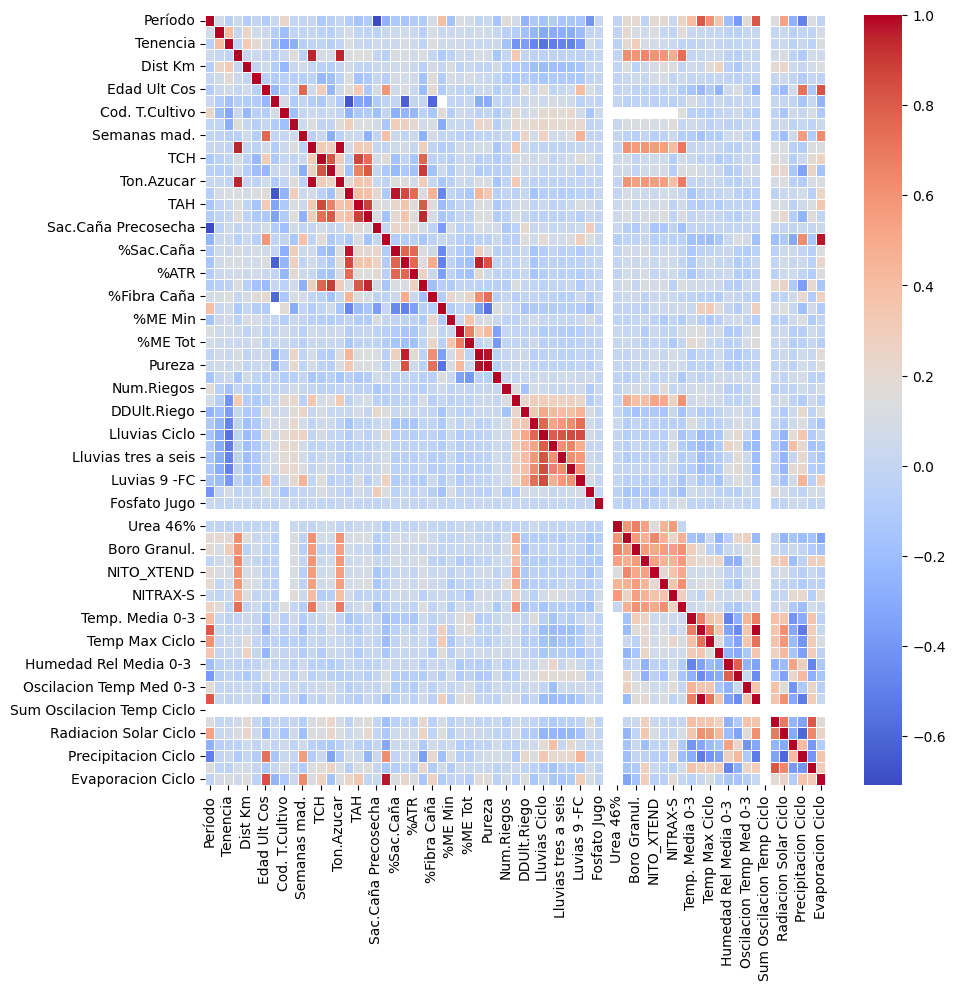

In [ ]:
df_copy_numeric = df_copy.select_dtypes(include=[np.number])
df_copy_categorical = df_copy.select_dtypes(exclude=[np.number])

# matriz de correlacion

corr_numeric = df_copy_numeric.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_numeric, annot=False, cmap='coolwarm', fmt = '.2f', linewidths=0.5)
plt.show()

In [ ]:
print("Valores de la matriz de correlacion:\n")
corr_numeric

Valores de la matriz de correlacion:



,Período,Hacienda,Tenencia,Area Neta,Dist Km,Cod.Estado #,Edad Ult Cos,Destino 1=Semilla,Cod. T.Cultivo,Dosis Madurante,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
Período,1.000000,0.074761,-0.055084,0.043686,-0.081780,-0.000865,-0.099738,0.022575,0.225025,-0.007931,...,-0.386199,0.179792,0.807988,NaN,0.127653,0.529998,-0.262400,-0.490137,0.128448,-0.028208
Hacienda,0.074761,1.000000,0.402264,0.012135,0.237300,0.065617,0.037857,-0.085571,-0.188247,-0.026291,...,-0.067008,0.001128,0.015843,NaN,0.001076,0.026622,-0.056647,-0.007773,-0.025297,0.090980
Tenencia,-0.055084,0.402264,1.000000,-0.020749,0.322651,0.193415,0.067515,-0.179825,-0.318877,-0.275601,...,-0.023346,0.002226,-0.014001,NaN,0.004550,0.033616,-0.048247,0.013031,-0.044679,0.111894
Area Neta,0.043686,0.012135,-0.020749,1.000000,0.014150,0.035206,-0.004592,-0.071274,0.029535,0.149367,...,-0.072006,0.018481,0.014296,NaN,0.072421,0.119102,-0.043611,-0.106130,0.079184,0.053594
Dist Km,-0.081780,0.237300,0.322651,0.014150,1.000000,-0.007177,0.060665,-0.091386,-0.228263,0.013535,...,-0.123218,0.025095,0.030854,NaN,0.195127,0.227598,0.050376,0.010427,0.073121,0.131321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Radiacion Solar Ciclo,0.529998,0.026622,0.033616,0.119102,0.227598,0.047806,-0.220567,0.000158,-0.136992,0.058301,...,-0.340310,0.165413,0.607782,NaN,0.698352,1.000000,-0.303654,-0.599344,0.640347,0.240943
Precipitacion 0_3,-0.262400,-0.056647,-0.048247,-0.043611,0.050376,-0.015786,0.065434,-0.008465,0.050011,-0.027532,...,0.228461,-0.412540,-0.318259,NaN,-0.242802,-0.303654,1.000000,0.404332,-0.383547,-0.097597
Precipitacion Ciclo,-0.490137,-0.007773,0.013031,-0.106130,0.010427,-0.091353,0.722373,-0.137353,0.013808,0.001334,...,0.415375,-0.115131,-0.515889,NaN,-0.340485,-0.599344,0.404332,1.000000,-0.402426,0.365673
Evaporacion 0-3,0.128448,-0.025297,-0.044679,0.079184,0.073121,0.007354,-0.114740,0.017210,0.100701,-0.027973,...,-0.283253,0.237519,0.300167,NaN,0.807877,0.640347,-0.383547,-0.402426,1.000000,0.325488


In [ ]:
# Analisis de conteo de ceros y NaN que hay en el Data Frame
zero_count = (df_copy == 0).sum()
nan_count = df_copy.isna().sum()
nan_percentage = (df_copy.isna().sum() / len(df_copy)) * 100

summary_df_copy = pd.DataFrame({
    'Zeros': zero_count,
    'NaNs': nan_count,
    '%NaNs': nan_percentage})

print("Tabla Resumen de valores: Ceros, NaNs, y %NaN:")
display(summary_df_copy)

Tabla Resumen de valores: Ceros, NaNs, y %NaN:


,Zeros,NaNs,%NaNs
Período,0,0,0.000000
Hacienda,0,0,0.000000
Nombre,0,0,0.000000
Zona,0,0,0.000000
Tenencia,0,1,0.004756
...,...,...,...
Radiacion Solar Ciclo,0,16497,78.456271
Precipitacion 0_3,0,16497,78.456271
Precipitacion Ciclo,0,16497,78.456271
Evaporacion 0-3,0,16497,78.456271


# 1.3: Umbral de analisis

In [ ]:
# variables con datos NaN mayores al 50%
var50_nan = nan_percentage[nan_percentage > 50]
var50_nan = var50_nan.sort_values(ascending=False)

# variables con datos NaN entre el 20% y 50%
var20_50_nan = nan_percentage[(nan_percentage > 20) & (nan_percentage <= 50)]
var20_50_nan = var20_50_nan.sort_values(ascending=False)

# variables con datos NaN entre el 5% y 20%
var5_20_nan = nan_percentage[(nan_percentage > 5) & (nan_percentage <=20)]
var5_20_nan = var5_20_nan.sort_values(ascending=False)

# variables con datos NaN menores al 5%
var5_nan = nan_percentage[nan_percentage <= 5]
var5_nan = var5_nan.sort_values(ascending=False)

print("\nVar50_nan: mayores al 50% de datos NaN:")
display(var50_nan)
print("\nVar20_50_nan: mayores al 20% y menores o iguales al 50% de datos NaN:")
display(var20_50_nan)
print("\nVar5_20_nan: mayores al 5% y menores o iguales al 20% de datos NaN:")
display(var5_20_nan)
print("\nVar5_nan: menores o iguales al 5% de datos NaN:")
display(var5_nan)


Var50_nan: mayores al 50% de datos NaN:


,0
Fert.Nitrogen.,100.000000
Sum Oscilacion Temp Ciclo,100.000000
Urea 46%,96.561564
NITRAX-S,96.442669
MEZ,95.382128
MicroZinc,94.535597
Boro Granul.,93.888810
Sul.Amonio,93.546393
NITO_XTEND,82.503448
Vinaza,80.510772



Var20_50_nan: mayores al 20% y menores o iguales al 50% de datos NaN:


,0
Producto,46.502116
Fec.Madur.,46.487849
Semanas mad.,46.487849



Var5_20_nan: mayores al 5% y menores o iguales al 20% de datos NaN:


,0
Suelo,17.872259
Vejez,11.627907
%AR Jugo,10.101298
Fosfato Jugo,8.836258
%Fibra Caña,8.836258
%Sac.Muestreadora,8.836258
%ME Min,8.189471
%ME Tot,8.179959
%ME Veg,8.179959
Sac.Caña Precosecha,5.221858



Var5_nan: menores o iguales al 5% de datos NaN:


,0
%ATR,2.482522
KATRHM,2.482522
%Sac.Caña,2.135350
Pureza,1.279308
Rdto,1.269796
Brix,1.269796
Ton.Azucar,1.146145
TAH,1.146145
TAHM,1.146145
Cerca de,0.599230


🚩 **Las variables que se encuentran en var50_nan, no son tomadas en consideracion.**

✅ **Se hace analisis para el resto, teniendo en consideracion que pueden o no aportar significancia al problema, (en las conclusiones de aborda con mayor detalle)**


*   VARIABLE PRODUCTO

In [ ]:
print("False = algun tipo de producto")
print("True = NaN \n")
print(df_copy['Producto'].isna())

False = algun tipo de producto
True = NaN 

0        False
1         True
2        False
3         True
4         True
         ...  
21022     True
21023     True
21024     True
21025     True
21026     True
Name: Producto, Length: 21027, dtype: bool


In [ ]:
#  tenga en cuenta que tenemos el 46.5% de datos NaN
print(f"Tipo de producto usado:\n ", df_copy['Producto'].value_counts())
print(f"\nConteo de NaN correspondiente variable producto: {df_copy['Producto'].isna().sum()}")
print(f"Porcentaje de datos NaN en la variable producto: {(df_copy['Producto'].isna().sum()/len(df_copy))*100:.2f}%")

Tipo de producto usado:
  Producto
BONUS 250 EC REGULADOR FISIOLÓGICO       7001
BONUS 250 EC REGULADOR FISIOLOGICO       3380
COADYUVANTE  DOUCE                        380
FERTILIZANTE LIQUIDO RENDIMIENTO          179
FUSILADE 2000 BL                           84
AGROFOSK-M                                 54
MADURANTE REGULADOR TRONNUSPAC 250 EC      36
FERTILIZANTE ORGÁNICO PATER-M              31
ROUND-UP MONSANTO 747 GRANULADO            29
baykal                                     22
PRODUCTO ENSAYO EN LITROS                  18
MADURANTE BIO SAFE ORGANIC                 17
TRANSLOK                                    7
OTROS MADURANTES                            4
GREEN LIFE                                  3
AMINA 2-4-D                                 2
HERBICIDA CLICK 40 SC                       1
GLIFOLAQ                                    1
Name: count, dtype: int64

Conteo de NaN correspondiente variable producto: 9778
Porcentaje de datos NaN en la variable producto: 46.50%


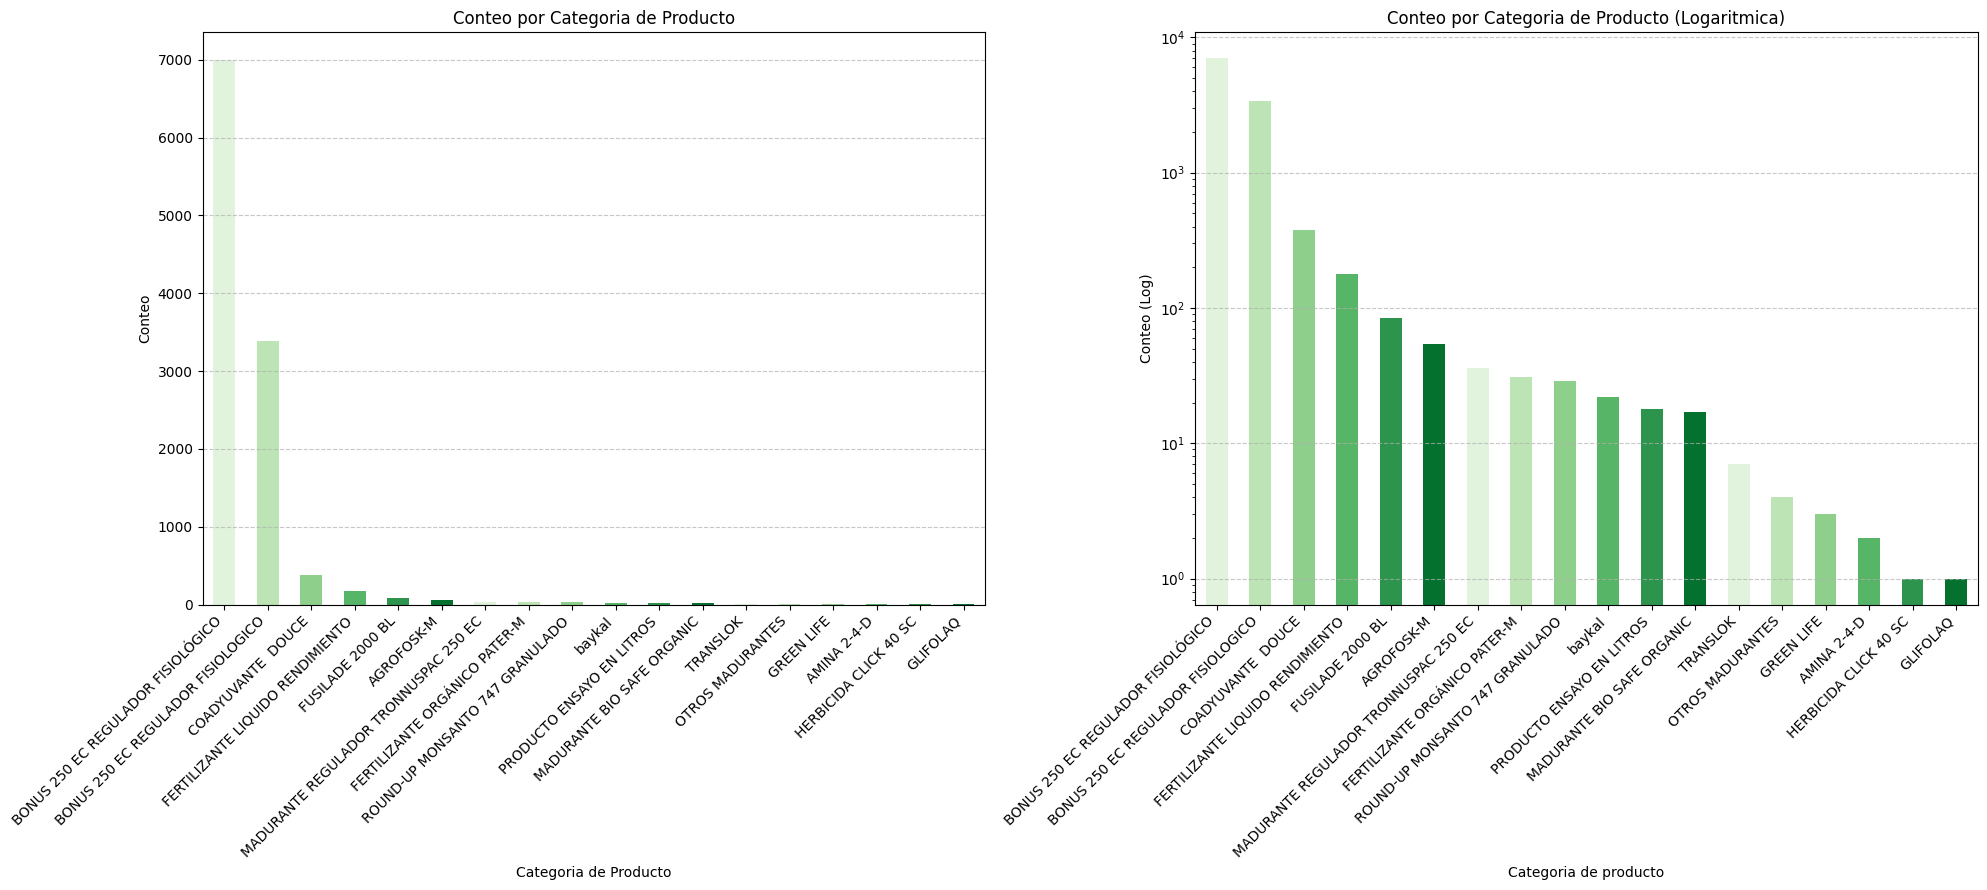

In [ ]:
producto_counts = df_copy['Producto'].value_counts()
palette = sns.color_palette("Greens")

fig, axes = plt.subplots(1,2, figsize=(20,9))
# grafica a escala normal
producto_counts.plot(kind='bar', color=palette, ax=axes[0])
axes[0].set_title('Conteo por Categoria de Producto')
axes[0].set_xlabel('Categoria de Producto')
axes[0].set_ylabel('Conteo')
axes[0].set_xticklabels(producto_counts.index, rotation=45, ha='right')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# grafica escala logaritmica
producto_counts.plot(kind='bar', color=palette, ax=axes[1])
axes[1].set_yscale('log')
axes[1].set_title('Conteo por Categoria de Producto (Logaritmica)')
axes[1].set_xlabel('Categoria de producto')
axes[1].set_ylabel('Conteo (Log)')
axes[1].set_xticklabels(producto_counts.index, rotation=45, ha='right')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# ajustar grafica
plt.tight_layout()
# mostrar
plt.show()

In [ ]:
# creamos una nueva variable, a la cual asignaremos todos NaN
# el significado de la variable, correspondera a el NO USO de productos en el cultivo
#df_copy['Producto'].append('NINGUNO')
#df_copy['Producto'] = df_copy['Producto'].replace('nan','NINGUNO')
#df_copy['Producto'].head()

In [ ]:
# transformo las categorias a VARIABLES INDEPENDIENTES
dummy_producto = pd.get_dummies(df_copy['Producto'], prefix='Producto', drop_first=True)

# agrupo Producto_BONUS 250 EC REGULADOR FISIOLÓGICO en una nueva variable
dummy_producto['Producto_REGULADOR FISIOLOGICO'] = dummy_producto['Producto_BONUS 250 EC REGULADOR FISIOLOGICO'] + dummy_producto['Producto_BONUS 250 EC REGULADOR FISIOLÓGICO']
dummy_producto = dummy_producto.drop(columns=['Producto_BONUS 250 EC REGULADOR FISIOLOGICO', 'Producto_BONUS 250 EC REGULADOR FISIOLÓGICO'])

print("Informacion de productos:\n")
dummy_producto.info()

Informacion de productos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 16 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   Producto_AMINA 2-4-D                            21027 non-null  bool 
 1   Producto_COADYUVANTE  DOUCE                     21027 non-null  bool 
 2   Producto_FERTILIZANTE LIQUIDO RENDIMIENTO       21027 non-null  bool 
 3   Producto_FERTILIZANTE ORGÁNICO PATER-M          21027 non-null  bool 
 4   Producto_FUSILADE 2000 BL                       21027 non-null  bool 
 5   Producto_GLIFOLAQ                               21027 non-null  bool 
 6   Producto_GREEN LIFE                             21027 non-null  bool 
 7   Producto_HERBICIDA CLICK 40 SC                  21027 non-null  bool 
 8   Producto_MADURANTE BIO SAFE ORGANIC             21027 non-null  bool 
 9   Producto_MADURANTE REGULADOR TRONN

In [ ]:
dummy_producto_dropped = dummy_producto.drop(columns=['Producto_AGROFOSK-M',
                                                      'Producto_FERTILIZANTE ORGÁNICO PATER-M',
                                                      'Producto_TRANSLOK',
                                                      'Producto_AMINA 2-4-D',
                                                      'Producto_baykal',
                                                      'Producto_FUSILADE 2000 BL',
                                                      'Producto_GLIFOLAQ',
                                                      'Producto_HERBICIDA CLICK 40 SC',
                                                      'Producto_ROUND-UP MONSANTO 747 GRANULADO',
                                                      'Producto_MADURANTE BIO SAFE ORGANIC',
                                                      'Producto_OTROS MADURANTES',
                                                      'Producto_PRODUCTO ENSAYO EN LITROS',
                                                      'Producto_GREEN LIFE', 'Producto_MADURANTE REGULADOR TRONNUSPAC 250 EC'], errors='ignore')
print("Tabala de Productos seleccionados:\n")
dummy_producto_dropped.head()

Tabala de Productos seleccionados:



,Producto_COADYUVANTE DOUCE,Producto_FERTILIZANTE LIQUIDO RENDIMIENTO,Producto_REGULADOR FISIOLOGICO
0,False,False,True
1,False,False,False
2,False,False,True
3,False,False,False
4,False,False,False


*   VARIABLE SUELO

In [ ]:
print("False = algun tipo de suelo")
print("True = NaN \n")
print(df_copy['Suelo'].isna())

False = algun tipo de suelo
True = NaN 

0        False
1         True
2        False
3         True
4        False
         ...  
21022    False
21023    False
21024    False
21025    False
21026    False
Name: Suelo, Length: 21027, dtype: bool


In [ ]:
#  tenga en cuenta que tenemos el 17.87% de datos NaN
print(f"Tipo de suelo usado en la cosecha:\n ", df_copy['Suelo'].value_counts())
print(f"\nConteo de NaN correspondiente variable Suelo: {df_copy['Suelo'].isna().sum()}")
print(f"Porcentaje de datos NaN en la variable Suelo: {(df_copy['Suelo'].isna().sum()/len(df_copy))*100:.2f}%")

Tipo de suelo usado en la cosecha:
  Suelo
CORINTIAS             4042
GALPON                2282
PALMIRA               1457
MANUELITA              742
NUEVO PICHICHI         599
                      ... 
PUERTO TEJADA            2
BRITANIA-CHUNDULAR       2
JORDAN-NIMA              2
UNION                    1
Sinaí                    1
Name: count, Length: 102, dtype: int64

Conteo de NaN correspondiente variable Suelo: 3758
Porcentaje de datos NaN en la variable Suelo: 17.87%


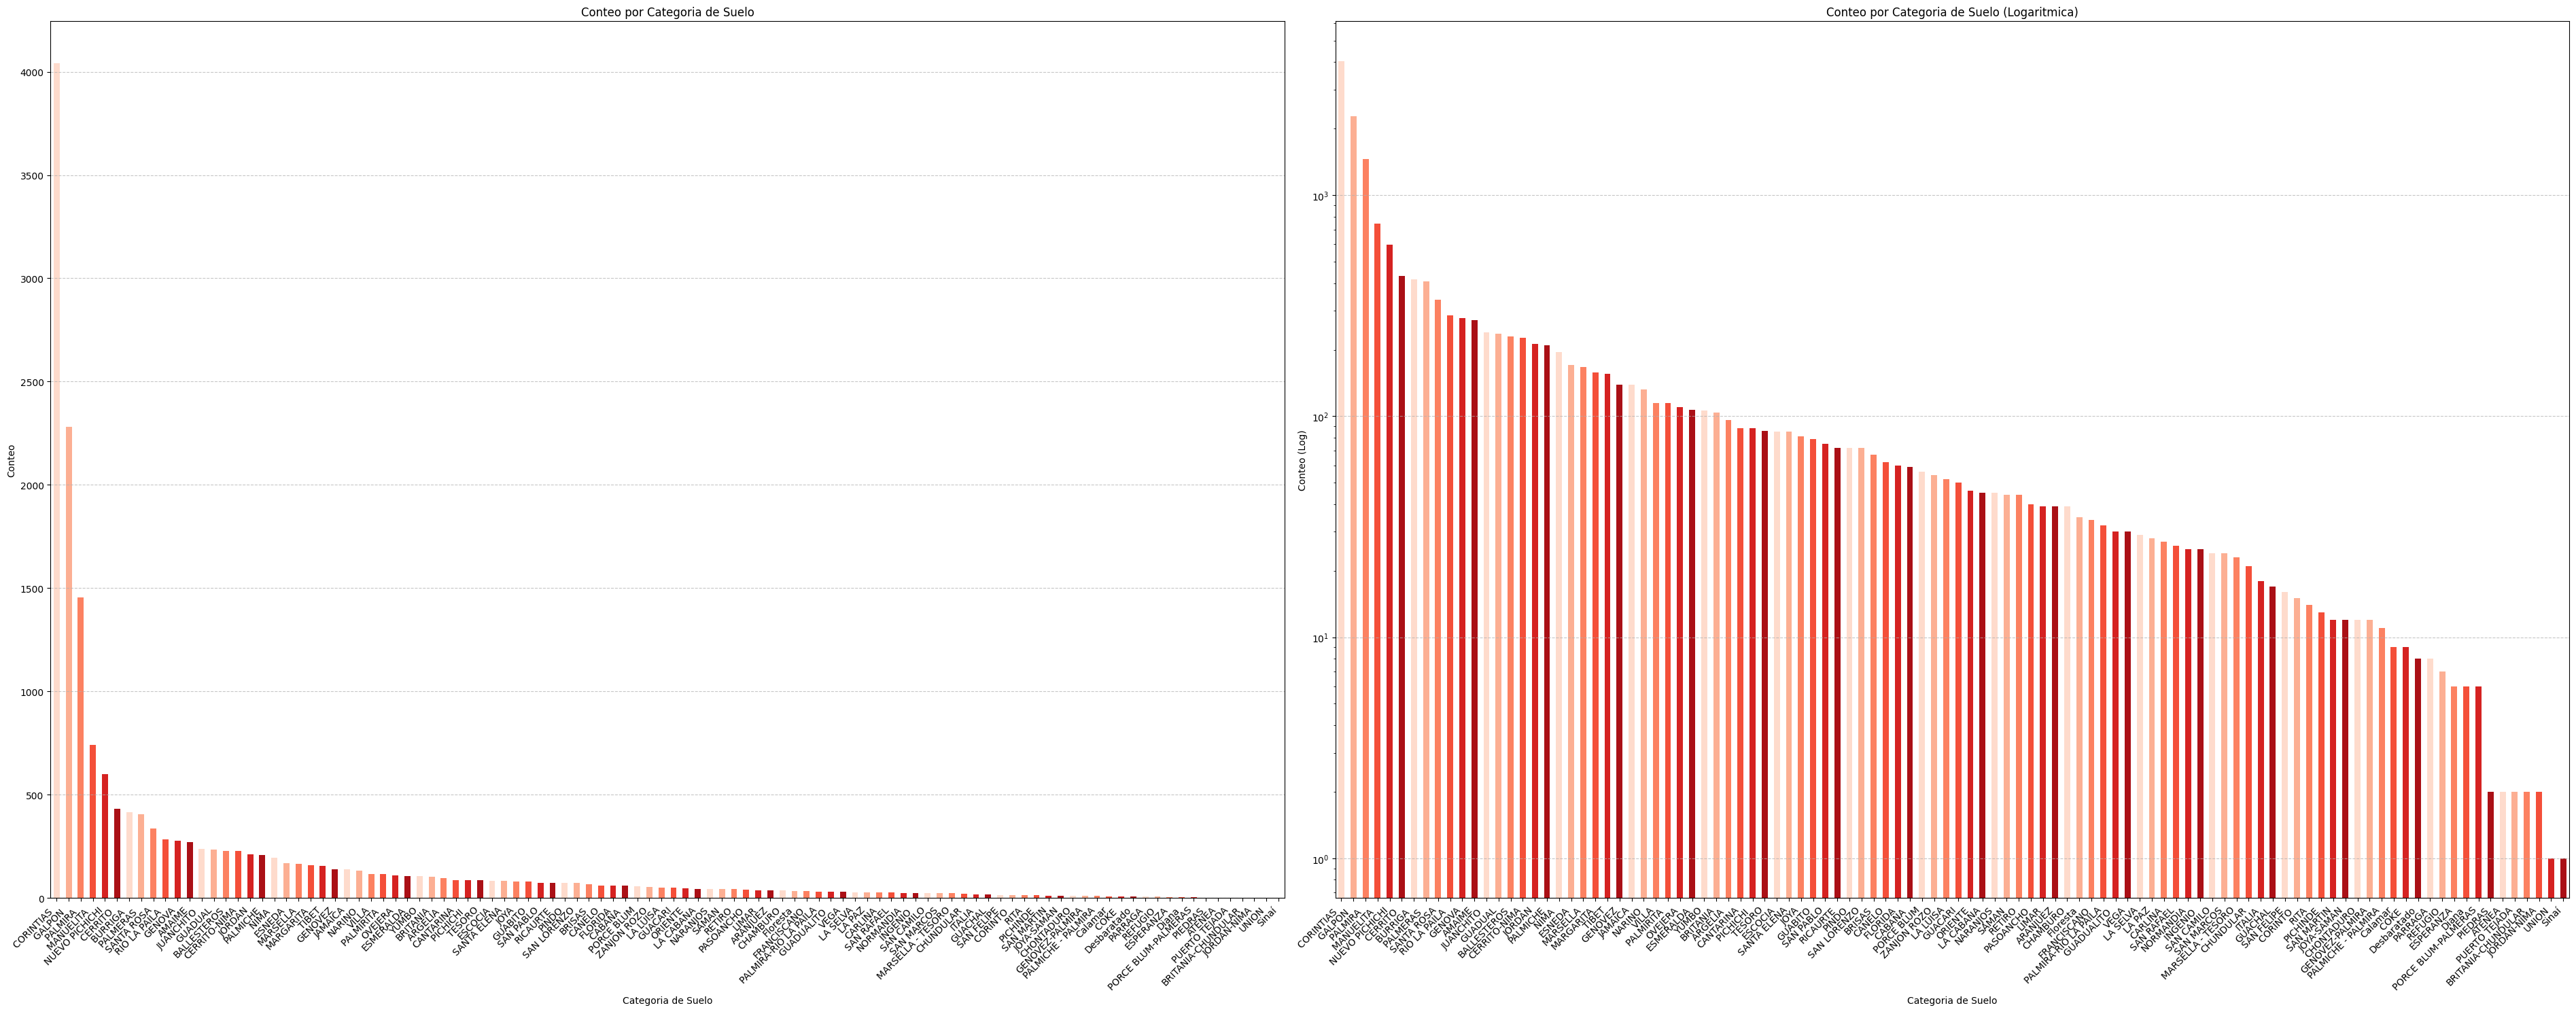

In [ ]:
suelo_counts = df_copy['Suelo'].value_counts()
palette2 = sns.color_palette("Reds")

fig, axes = plt.subplots(1,2, figsize=(38,15))
# grafica a escala normal
suelo_counts.plot(kind='bar', color=palette2, ax=axes[0])
axes[0].set_title('Conteo por Categoria de Suelo')
axes[0].set_xlabel('Categoria de Suelo')
axes[0].set_ylabel('Conteo')
axes[0].set_xticklabels(suelo_counts.index, rotation=45, ha='right')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# grafica escala logaritmica
suelo_counts.plot(kind='bar', color=palette2, ax=axes[1])
axes[1].set_yscale('log')
axes[1].set_title('Conteo por Categoria de Suelo (Logaritmica)')
axes[1].set_xlabel('Categoria de Suelo')
axes[1].set_ylabel('Conteo (Log)')
axes[1].set_xticklabels(suelo_counts.index, rotation=45, ha='right')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# ajustar grafica
plt.tight_layout()
# mostrar
plt.show()

*   VARIABLE VEJEZ

In [ ]:
#  tenga en cuenta que tenemos el 11.63% de datos NaN
print(f"Informacion descriptiva de la variable Vejez:\n {df_copy['Vejez'].describe()}")
print(f"\nConteo de NaN correspondiente variable Vejez: {df_copy['Vejez'].isna().sum()}")
print(f"Porcentaje de datos NaN en la variable Vejez: {(df_copy['Vejez'].isna().sum()/len(df_copy))*100:.2f}%")

Informacion descriptiva de la variable Vejez:
 count    18582.000000
mean        12.294125
std         20.993880
min          0.017000
25%          2.108000
50%          2.737000
75%         10.756750
max        205.650000
Name: Vejez, dtype: float64

Conteo de NaN correspondiente variable Vejez: 2445
Porcentaje de datos NaN en la variable Vejez: 11.63%


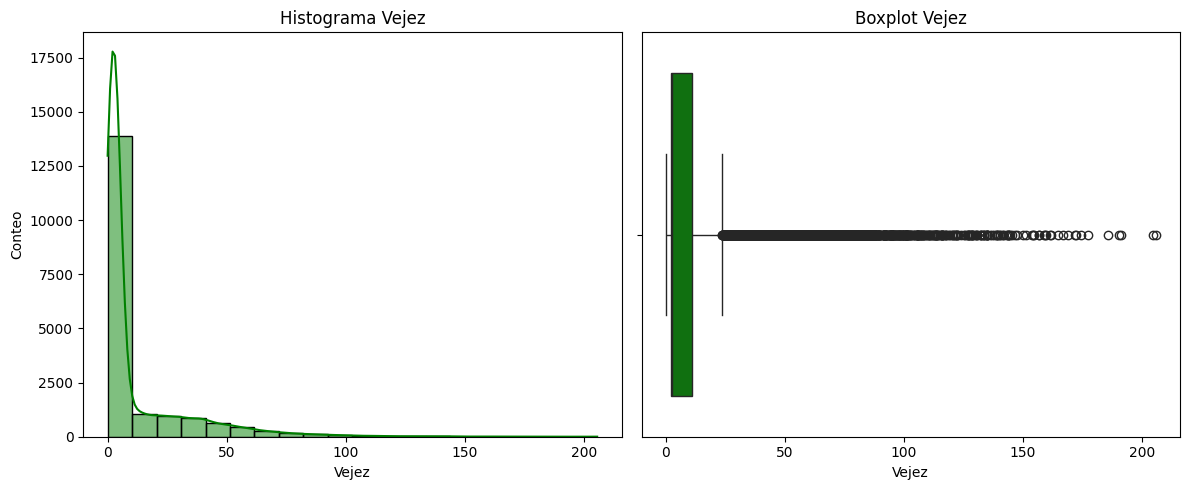

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
# histograma
sns.histplot(df_copy['Vejez'], bins=20, kde=True, ax=axes[0], color="green")
axes[0].set_title("Histograma Vejez")
axes[0].set_xlabel("Vejez")
axes[0].set_ylabel("Conteo")

# boxplot
sns.boxplot(x=df_copy['Vejez'], ax=axes[1], color="green")
axes[1].set_title("Boxplot Vejez")
axes[1].set_xlabel("Vejez")

# ajustar grafica
plt.tight_layout()
# mostrar
plt.show()

*   VARIABLE %AR JUGO

In [ ]:
#  tenga en cuenta que tenemos el 10.10% de datos NaN
print(f"Informacion descriptiva de la variable %AR Jugo:\n {df_copy['%AR Jugo'].describe()}")
print(f"\nConteo de NaN correspondiente variable %AR Jugo: {df_copy['%AR Jugo'].isna().sum()}")
print(f"Porcentaje de datos NaN en la variable %AR Jugo: {(df_copy['%AR Jugo'].isna().sum()/len(df_copy))*100:.2f}%")

Informacion descriptiva de la variable %AR Jugo:
 count    18903.000000
mean         0.737819
std          0.238630
min          0.100000
25%          0.568600
50%          0.700000
75%          0.860300
max          2.370000
Name: %AR Jugo, dtype: float64

Conteo de NaN correspondiente variable %AR Jugo: 2124
Porcentaje de datos NaN en la variable %AR Jugo: 10.10%


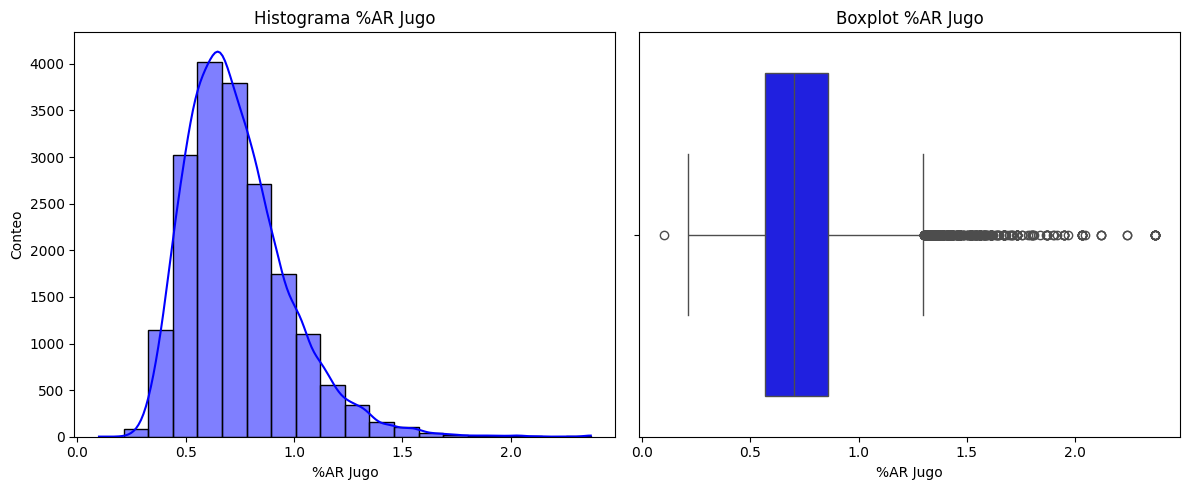

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
# histograma
sns.histplot(df_copy['%AR Jugo'], bins=20, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Histograma %AR Jugo")
axes[0].set_xlabel("%AR Jugo")
axes[0].set_ylabel("Conteo")

# boxplot
sns.boxplot(x=df_copy['%AR Jugo'], ax=axes[1], color="blue")
axes[1].set_title("Boxplot %AR Jugo")
axes[1].set_xlabel("%AR Jugo")

# ajustar grafica
plt.tight_layout()
# mostrar
plt.show()

*   VARIABLE FOSFATO JUGO

In [ ]:
#  tenga en cuenta que tenemos el 8.84% de datos NaN
print(f"Informacion descriptiva de la variable Fosfato Jugo:\n {df_copy['Fosfato Jugo'].describe()}")
print(f"\nConteo de NaN correspondiente variable Fosfato Jugo: {df_copy['Fosfato Jugo'].isna().sum()}")
print(f"Porcentaje de datos NaN en la variable Fosfato Jugo: {(df_copy['Fosfato Jugo'].isna().sum()/len(df_copy))*100:.2f}%")

Informacion descriptiva de la variable Fosfato Jugo:
 count     19169.000000
mean        332.501252
std        1605.182193
min           0.000000
25%         232.867800
50%         289.000000
75%         359.000000
max      143728.067500
Name: Fosfato Jugo, dtype: float64

Conteo de NaN correspondiente variable Fosfato Jugo: 1858
Porcentaje de datos NaN en la variable Fosfato Jugo: 8.84%


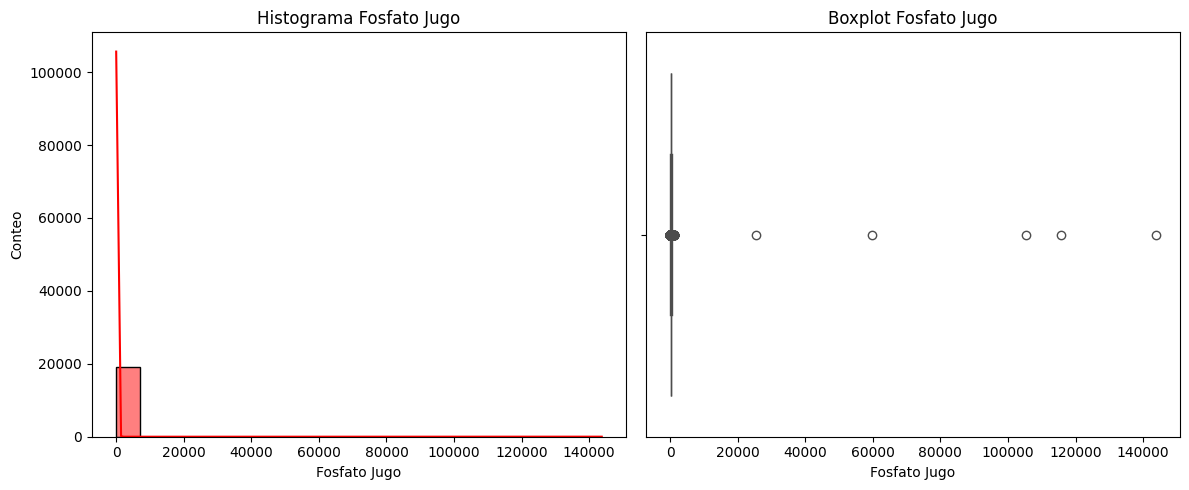

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
# histograma
sns.histplot(df_copy['Fosfato Jugo'], bins=20, kde=True, ax=axes[0], color="red")
axes[0].set_title("Histograma Fosfato Jugo")
axes[0].set_xlabel("Fosfato Jugo")
axes[0].set_ylabel("Conteo")

# boxplot
sns.boxplot(x=df_copy['Fosfato Jugo'], ax=axes[1], color="red")
axes[1].set_title("Boxplot Fosfato Jugo")
axes[1].set_xlabel("Fosfato Jugo")

# ajustar grafica
plt.tight_layout()
# mostrar
plt.show()

*   VARIABLES %FIBRA CAÑA Y %SAC.MUESTREADORA

In [ ]:
fibra_c = df_copy['%Fibra Caña'].describe()
sac_m = df_copy['%Sac.Muestreadora'].describe()

summary = pd.DataFrame({
    '%Fibra Caña': fibra_c,
    '%Sac.Muestreadora': sac_m})

print("Tabla Resumen valores descriptivos:")
display(summary)

#  tenga en cuenta que tenemos el 8.84% de datos NaN
print(f"\nConteo de NaN correspondiente variable %Fibra Caña: {df_copy['%Fibra Caña'].isna().sum()}")
print(f"Porcentaje de datos NaN en la variable %Fibra Caña: {(df_copy['%Fibra Caña'].isna().sum()/len(df_copy))*100:.2f}%")
#  tenga en cuenta que tenemos el 8.84% de datos NaN
print(f"\nConteo de NaN correspondiente variable %Sac.Muestreadora: {df_copy['%Sac.Muestreadora'].isna().sum()}")
print(f"Porcentaje de datos NaN en la variable %Sac.Muestreadora: {(df_copy['%Sac.Muestreadora'].isna().sum()/len(df_copy))*100:.2f}%")

Tabla Resumen valores descriptivos:


,%Fibra Caña,%Sac.Muestreadora
count,19169.000000,19169.000000
mean,15.275538,12.834918
std,2.493603,2.001026
min,0.000000,0.000000
25%,14.327400,12.148700
50%,15.314600,13.049400
75%,16.398900,13.905000
max,32.212000,18.375600



Conteo de NaN correspondiente variable %Fibra Caña: 1858
Porcentaje de datos NaN en la variable %Fibra Caña: 8.84%

Conteo de NaN correspondiente variable %Sac.Muestreadora: 1858
Porcentaje de datos NaN en la variable %Sac.Muestreadora: 8.84%


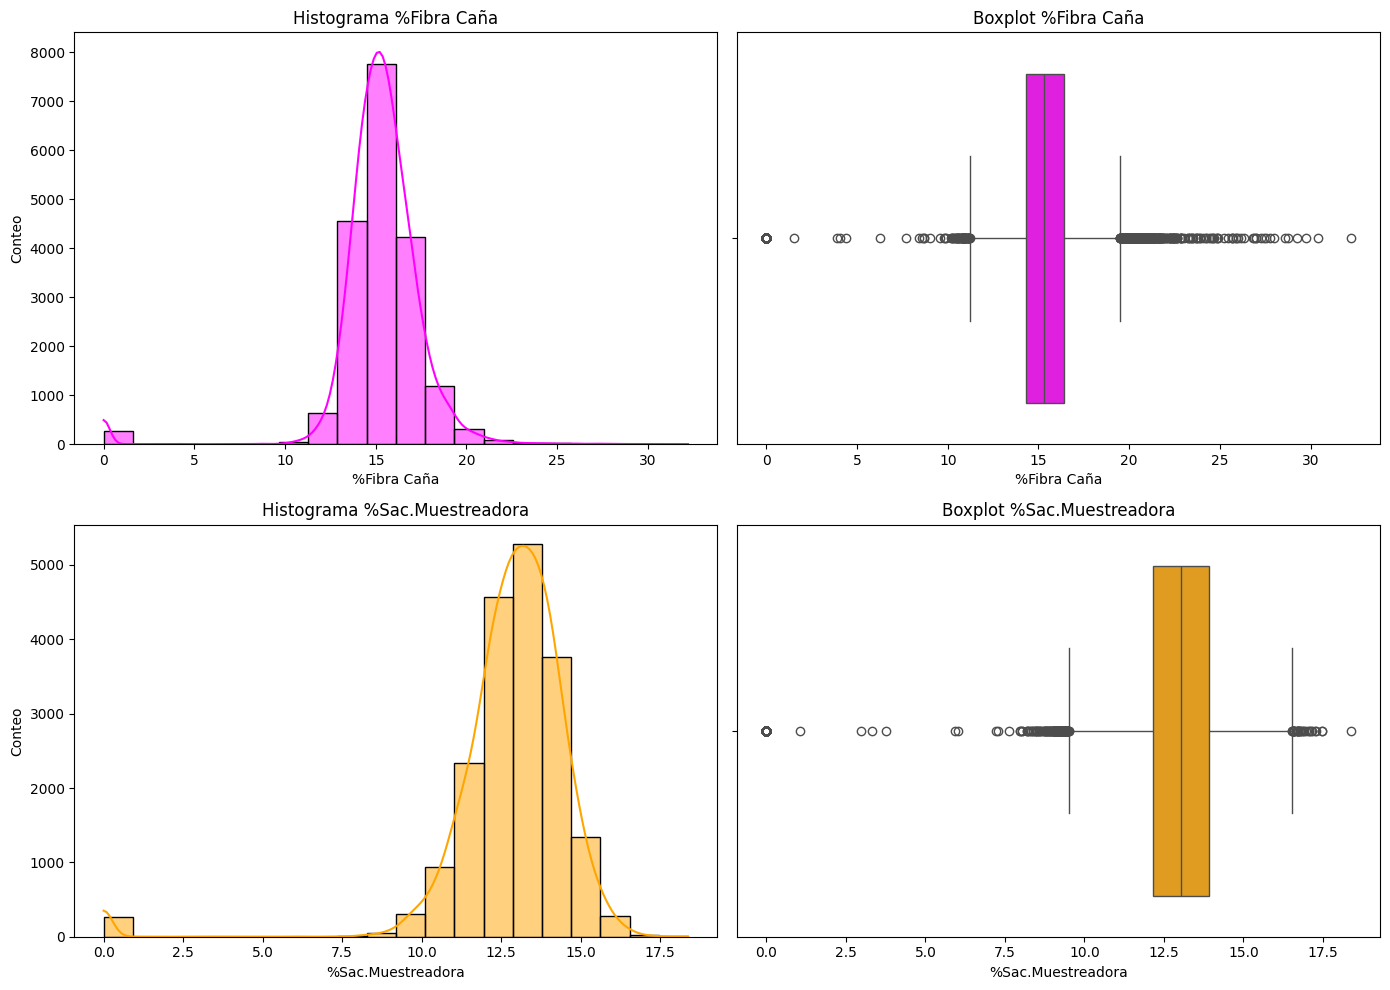

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(14,10))
# histograma
sns.histplot(df_copy['%Fibra Caña'], bins=20, kde=True, ax=axes[0,0], color="magenta")
axes[0,0].set_title("Histograma %Fibra Caña")
axes[0,0].set_xlabel("%Fibra Caña")
axes[0,0].set_ylabel("Conteo")

# boxplot
sns.boxplot(x=df_copy['%Fibra Caña'], ax=axes[0,1], color="magenta")
axes[0,1].set_title("Boxplot %Fibra Caña")
axes[0,1].set_xlabel("%Fibra Caña")

# histograma
sns.histplot(df_copy['%Sac.Muestreadora'], bins=20, kde=True, ax=axes[1,0], color="orange")
axes[1,0].set_title("Histograma %Sac.Muestreadora")
axes[1,0].set_xlabel("%Sac.Muestreadora")
axes[1,0].set_ylabel("Conteo")

# boxplot
sns.boxplot(x=df_copy['%Sac.Muestreadora'], ax=axes[1,1], color="orange")
axes[1,1].set_title("Boxplot %Sac.Muestreadora")
axes[1,1].set_xlabel("%Sac.Muestreadora")

# ajustar grafica
plt.tight_layout()
# mostrar
plt.show()

*   VARIABLE SAC.CAÑA PRECOSECHA

In [ ]:
#  tenga en cuenta que tenemos el 5.22% de datos NaN
print(f"Informacion descriptiva de la variable Sac.Caña Precosecha:\n {df_copy['Sac.Caña Precosecha'].describe()}")
print(f"\nConteo de NaN correspondiente variable Sac.Caña Precosecha: {df_copy['Sac.Caña Precosecha'].isna().sum()}")
print(f"Porcentaje de datos NaN en la variable Sac.Caña Precosecha: {(df_copy['Sac.Caña Precosecha'].isna().sum()/len(df_copy))*100:.2f}%")

Informacion descriptiva de la variable Sac.Caña Precosecha:
 count    19929.000000
mean         7.802876
std          8.507614
min          0.000000
25%          0.000000
50%          0.000000
75%         16.960100
max         44.776800
Name: Sac.Caña Precosecha, dtype: float64

Conteo de NaN correspondiente variable Sac.Caña Precosecha: 1098
Porcentaje de datos NaN en la variable Sac.Caña Precosecha: 5.22%


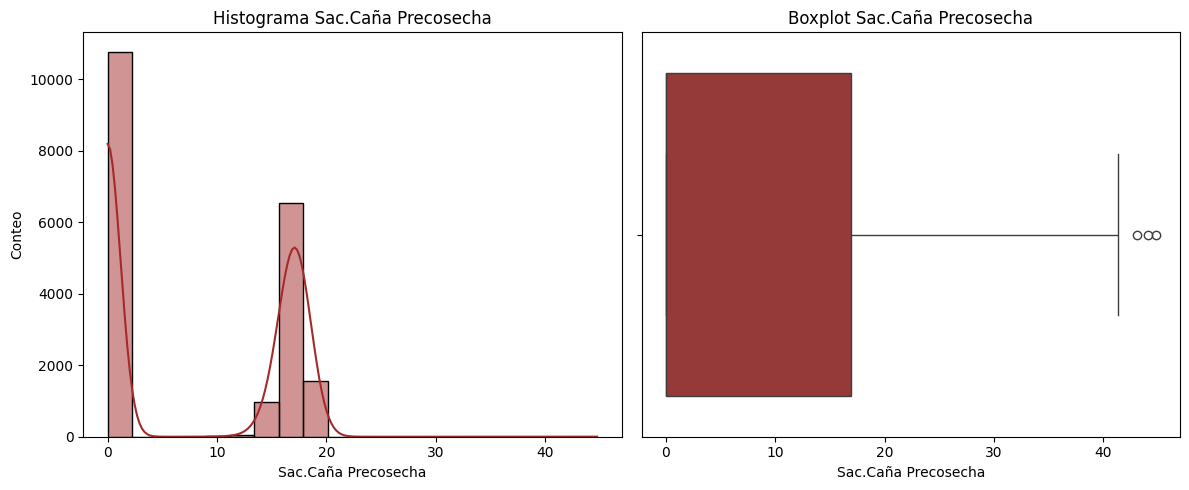

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
# histograma
sns.histplot(df_copy['Sac.Caña Precosecha'], bins=20, kde=True, ax=axes[0], color="brown")
axes[0].set_title("Histograma Sac.Caña Precosecha")
axes[0].set_xlabel("Sac.Caña Precosecha")
axes[0].set_ylabel("Conteo")

# boxplot
sns.boxplot(x=df_copy['Sac.Caña Precosecha'], ax=axes[1], color="brown")
axes[1].set_title("Boxplot Sac.Caña Precosecha")
axes[1].set_xlabel("Sac.Caña Precosecha")

# ajustar grafica
plt.tight_layout()
# mostrar
plt.show()

*   VARIABLE %ME MIN, %ME VEG, %ME TOT

In [ ]:
MEmin = df_copy['%ME Min'].describe()
MEveg = df_copy['%ME Veg'].describe()
MEtot = df_copy['%ME Tot'].describe()

summary_ME = pd.DataFrame({
    '%ME Min': MEmin,
    '%ME Veg': MEveg,
    '%ME Tot': MEtot})

print("Tabla Resumen valores descriptivos:")
display(summary_ME)

#  tenga en cuenta que tenemos el 8.19% de datos NaN
print(f"\nConteo de NaN correspondiente variable %ME Min: {df_copy['%ME Min'].isna().sum()}")
print(f"Porcentaje de datos NaN en la variable %ME Min: {(df_copy['%ME Min'].isna().sum()/len(df_copy))*100:.2f}%")
#  tenga en cuenta que tenemos el 8.18% de datos NaN
print(f"\nConteo de NaN correspondiente variable %ME Veg: {df_copy['%ME Veg'].isna().sum()}")
print(f"Porcentaje de datos NaN en la variable %ME Veg: {(df_copy['%ME Veg'].isna().sum()/len(df_copy))*100:.2f}%")
#  tenga en cuenta que tenemos el 8.18% de datos NaN
print(f"\nConteo de NaN correspondiente variable %ME Tot: {df_copy['%ME Tot'].isna().sum()}")
print(f"Porcentaje de datos NaN en la variable %ME Tot: {(df_copy['%ME Tot'].isna().sum()/len(df_copy))*100:.2f}%")

Tabla Resumen valores descriptivos:


,%ME Min,%ME Veg,%ME Tot
count,19305.00000,19307.000000,19307.000000
mean,0.63653,7.761020,8.600761
std,0.95059,3.108904,2.482570
min,0.00000,0.000000,0.200000
25%,0.12100,6.786150,7.431900
50%,0.34170,8.085300,8.666000
75%,0.77100,9.218000,10.025000
max,12.90400,240.084200,67.514000



Conteo de NaN correspondiente variable %ME Min: 1722
Porcentaje de datos NaN en la variable %ME Min: 8.19%

Conteo de NaN correspondiente variable %ME Veg: 1720
Porcentaje de datos NaN en la variable %ME Veg: 8.18%

Conteo de NaN correspondiente variable %ME Tot: 1720
Porcentaje de datos NaN en la variable %ME Tot: 8.18%


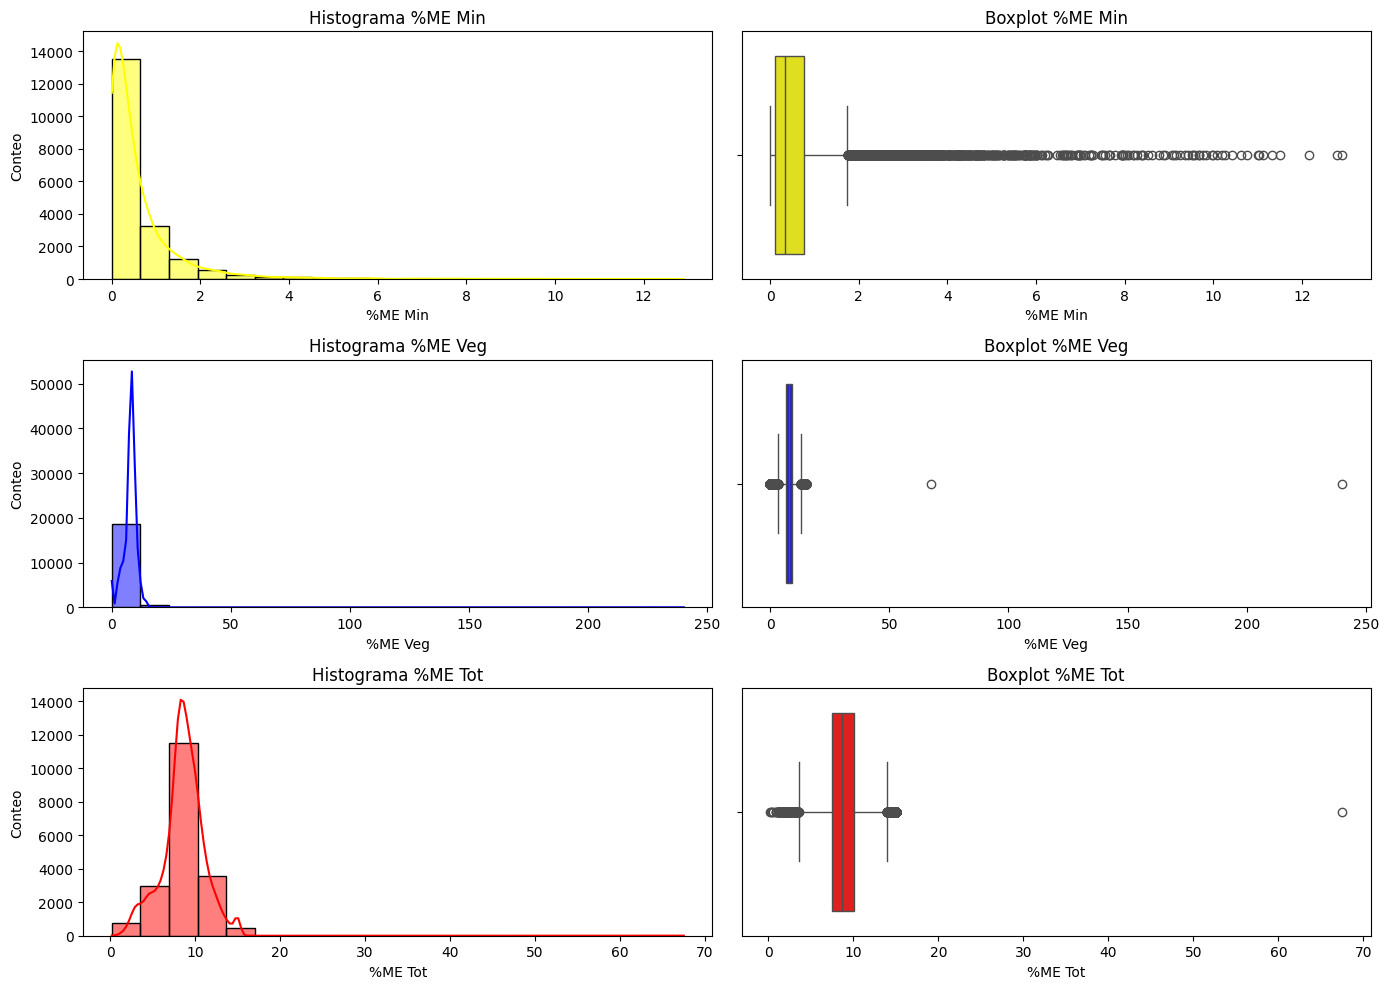

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(14,10))
# histograma
sns.histplot(df_copy['%ME Min'], bins=20, kde=True, ax=axes[0,0], color="yellow")
axes[0,0].set_title("Histograma %ME Min")
axes[0,0].set_xlabel("%ME Min")
axes[0,0].set_ylabel("Conteo")

# boxplot
sns.boxplot(x=df_copy['%ME Min'], ax=axes[0,1], color="yellow")
axes[0,1].set_title("Boxplot %ME Min")
axes[0,1].set_xlabel("%ME Min")

# histograma
sns.histplot(df_copy['%ME Veg'], bins=20, kde=True, ax=axes[1,0], color="blue")
axes[1,0].set_title("Histograma %ME Veg")
axes[1,0].set_xlabel("%ME Veg")
axes[1,0].set_ylabel("Conteo")

# boxplot
sns.boxplot(x=df_copy['%ME Veg'], ax=axes[1,1], color="blue")
axes[1,1].set_title("Boxplot %ME Veg")
axes[1,1].set_xlabel("%ME Veg")

# histograma
sns.histplot(df_copy['%ME Tot'], bins=20, kde=True, ax=axes[2,0], color="red")
axes[2,0].set_title("Histograma %ME Tot")
axes[2,0].set_xlabel("%ME Tot")
axes[2,0].set_ylabel("Conteo")

# boxplot
sns.boxplot(x=df_copy['%ME Tot'], ax=axes[2,1], color="red")
axes[2,1].set_title("Boxplot %ME Tot")
axes[2,1].set_xlabel("%ME Tot")

# ajustar grafica
plt.tight_layout()
# mostrar
plt.show()

*   VARIABLE COD.ESTADO #

In [ ]:
#  tenga en cuenta que tenemos el 0.0% de datos NaN
print(f"Informacion descriptiva de la variable Cod.Estado #:\n {df_copy['Cod.Estado #'].describe()}")
print(f"\nConteo de NaN correspondiente variable Cod.Estado #: {df_copy['Cod.Estado #'].isna().sum()}")
print(f"Porcentaje de datos NaN en la variable Cod.Estado #: {(df_copy['Cod.Estado #'].isna().sum()/len(df_copy))*100:.2f}%")

Informacion descriptiva de la variable Cod.Estado #:
 count    21027.000000
mean         4.261806
std          4.111935
min          0.000000
25%          1.000000
50%          3.000000
75%          6.000000
max         31.000000
Name: Cod.Estado #, dtype: float64

Conteo de NaN correspondiente variable Cod.Estado #: 0
Porcentaje de datos NaN en la variable Cod.Estado #: 0.00%


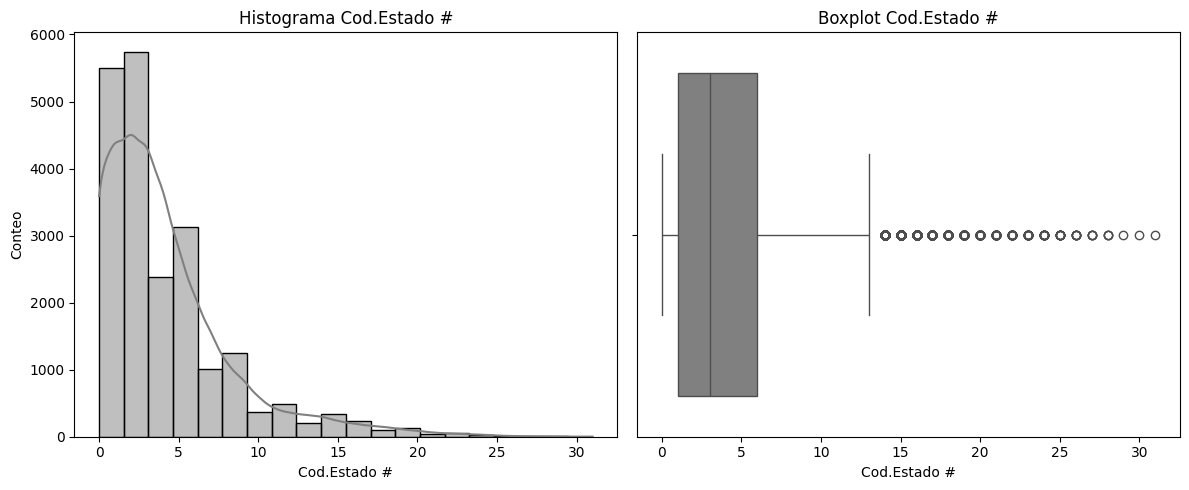

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
# histograma
sns.histplot(df_copy['Cod.Estado #'], bins=20, kde=True, ax=axes[0], color="gray")
axes[0].set_title("Histograma Cod.Estado #")
axes[0].set_xlabel("Cod.Estado #")
axes[0].set_ylabel("Conteo")

# boxplot
sns.boxplot(x=df_copy['Cod.Estado #'], ax=axes[1], color="gray")
axes[1].set_title("Boxplot Cod.Estado #")
axes[1].set_xlabel("Cod.Estado #")

# ajustar grafica
plt.tight_layout()
# mostrar
plt.show()

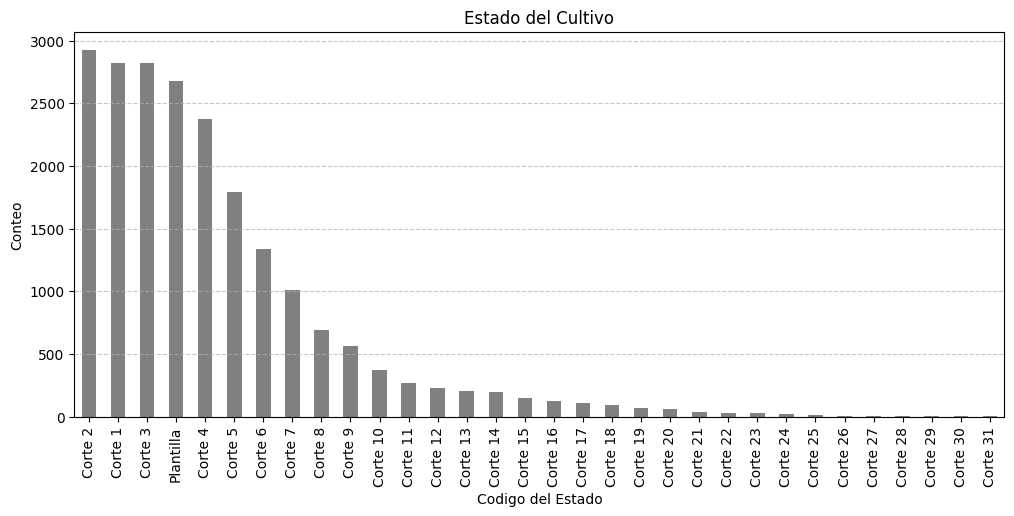

In [ ]:
cod_estado_counts = df_copy['Cod.Estado'].value_counts()

cod_estado_counts.plot(kind='bar', color='gray', figsize=(12,5))
plt.title('Estado del Cultivo')
plt.xlabel('Codigo del Estado')
plt.ylabel('Conteo')
plt.grid(axis='y', linestyle='--', alpha=0.7)

*   VARIABLE COD.T.CULTIVO

In [ ]:
#  tenga en cuenta que tenemos el 0.01% de datos NaN
print(f"Informacion descriptiva de la variable Cod.T.Cultivo:\n {df_copy['Cod. T.Cultivo'].describe()}")
print(f"\nConteo de NaN correspondiente variable Cod.T.Cultivo: {df_copy['Cod. T.Cultivo'].isna().sum()}")
print(f"Porcentaje de datos NaN en la variable Cod.T.Cultivo: {(df_copy['Cod. T.Cultivo'].isna().sum()/len(df_copy))*100:.2f}%")

Informacion descriptiva de la variable Cod.T.Cultivo:
 count    21025.000000
mean         1.036100
std          0.186543
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: Cod. T.Cultivo, dtype: float64

Conteo de NaN correspondiente variable Cod.T.Cultivo: 2
Porcentaje de datos NaN en la variable Cod.T.Cultivo: 0.01%


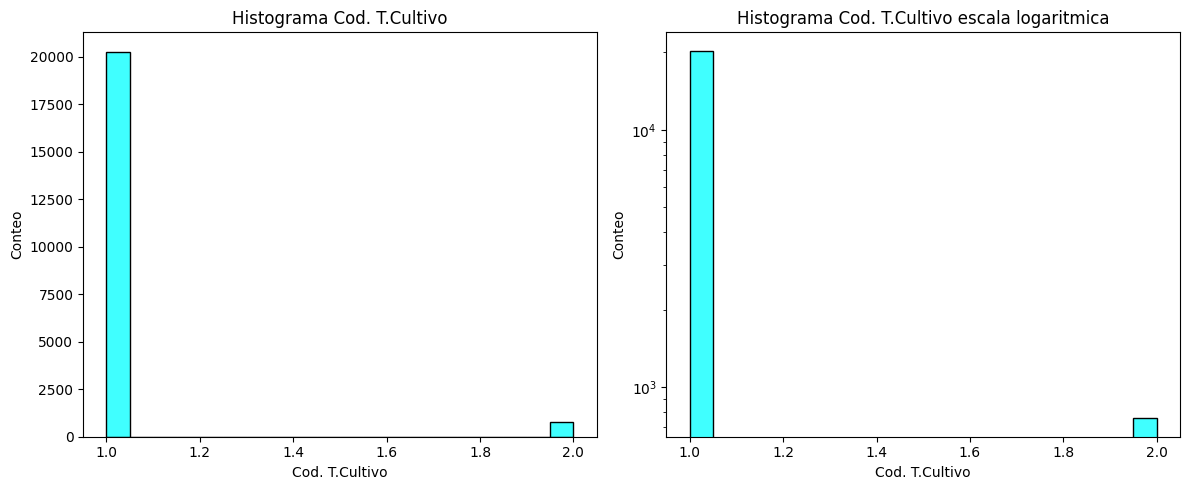

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
# histograma
sns.histplot(df_copy['Cod. T.Cultivo'], bins=20, ax=axes[0], color="cyan")
axes[0].set_title("Histograma Cod. T.Cultivo")
axes[0].set_xlabel("Cod. T.Cultivo")
axes[0].set_ylabel("Conteo")

# histograma escala logaritmica
sns.histplot(df_copy['Cod. T.Cultivo'], bins=20, ax=axes[1], color="cyan")
axes[1].set_yscale('log')
axes[1].set_title("Histograma Cod. T.Cultivo escala logaritmica")
axes[1].set_xlabel("Cod. T.Cultivo")
axes[1].set_ylabel("Conteo")

# ajustar grafica
plt.tight_layout()
# mostrar
plt.show()

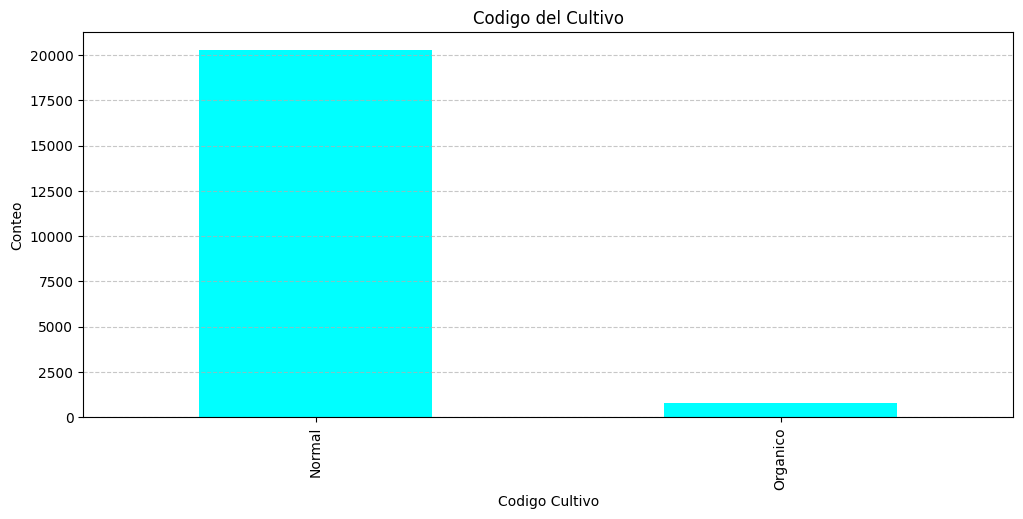

In [ ]:
cod_cultivo_counts = df_copy['Cultivo'].value_counts()

cod_cultivo_counts.plot(kind='bar', color='cyan', figsize=(12,5))
plt.title('Codigo del Cultivo')
plt.xlabel('Codigo Cultivo')
plt.ylabel('Conteo')
plt.grid(axis='y', linestyle='--', alpha=0.7)

*   VARIABLE TIPO QUEMA

In [ ]:
#  tenga en cuenta que tenemos el 0.0% de datos NaN
print(f"Tipo de quema usado en la cosecha:\n ", df_copy['Tipo Quema'].value_counts())
print(f"\nConteo de NaN correspondiente variable tipo quema: {df_copy['Tipo Quema'].isna().sum()}")
print(f"Porcentaje de datos NaN en la variable tipo quema: {(df_copy['Tipo Quema'].isna().sum()/len(df_copy))*100:.2f}%")

Tipo de quema usado en la cosecha:
  Tipo Quema
VERDE           16204
Q.ACCIDENTAL     2470
Q.PROGRAMADA     1536
NO DEF.           523
SEMILLA           294
Name: count, dtype: int64

Conteo de NaN correspondiente variable tipo quema: 0
Porcentaje de datos NaN en la variable tipo quema: 0.00%


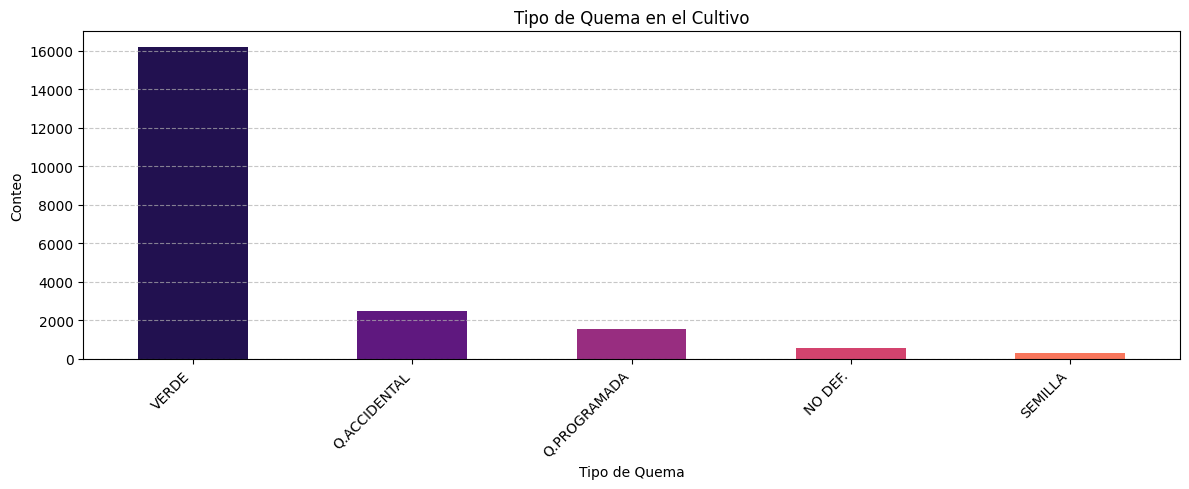

In [ ]:
quema_counts = df_copy['Tipo Quema'].value_counts()
palette3 = sns.color_palette("magma")

# grafica
quema_counts.plot(kind='bar', color=palette3, figsize=(12,5))
plt.title('Tipo de Quema en el Cultivo')
plt.xlabel('Tipo de Quema')
plt.ylabel('Conteo')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# ajustar grafica
plt.tight_layout()
# mostrar
plt.show()

In [ ]:
# transformo las categorias a VARIABLES INDEPENDIENTES
dummy_quema = pd.get_dummies(df_copy['Tipo Quema'], prefix='quema', drop_first=True)
dummy_quema = dummy_quema.drop(columns=['quema_Q.ACCIDENTAL', 'quema_Q.PROGRAMADA', 'quema_SEMILLA'])
print("Informacion de Tipo de Quema:\n")
dummy_quema.head()

Informacion de Tipo de Quema:



,quema_VERDE
0,True
1,False
2,True
3,False
4,False


*   VARIABLE ZONA

In [ ]:
#  tenga en cuenta que tenemos el 0.0% de datos NaN
print(f"Tipo de Zona:\n ", df_copy['Zona'].value_counts())
print(f"\nConteo de NaN correspondiente variable Zona: {df_copy['Zona'].isna().sum()}")
print(f"Porcentaje de datos NaN en la variable Zona: {(df_copy['Zona'].isna().sum()/len(df_copy))*100:.2f}%")

Tipo de Zona:
  Zona
IP05    7813
IP03    5184
IP06    4113
IP01    2307
IP02    1595
ip05      14
IC07       1
Name: count, dtype: int64

Conteo de NaN correspondiente variable Zona: 0
Porcentaje de datos NaN en la variable Zona: 0.00%


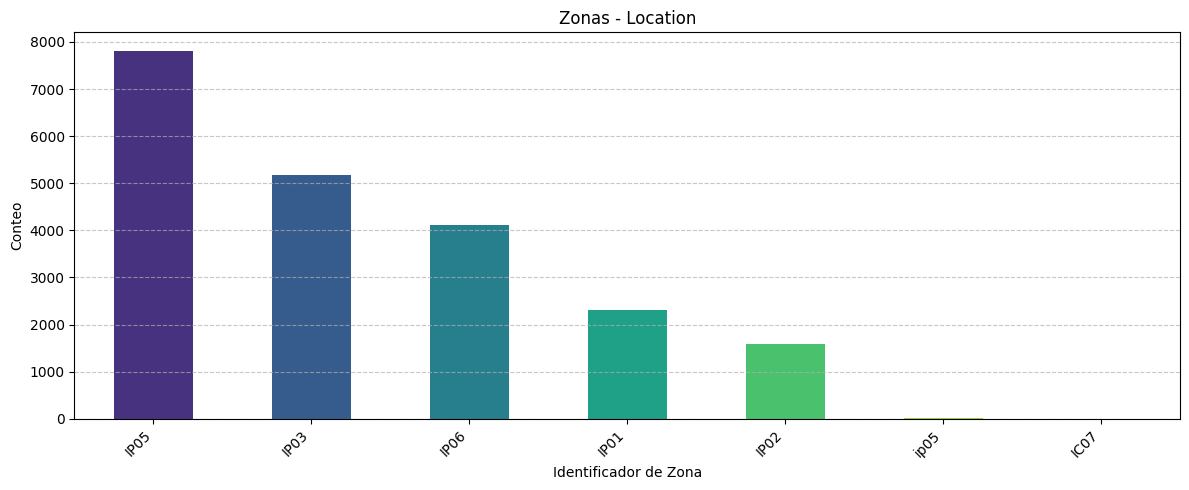

In [ ]:
zona_counts = df_copy['Zona'].value_counts()
palette4 = sns.color_palette("viridis")

# grafica
zona_counts.plot(kind='bar', color=palette4, figsize=(12,5))
plt.title('Zonas - Location')
plt.xlabel('Identificador de Zona')
plt.ylabel('Conteo')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# ajustar grafica
plt.tight_layout()
# mostrar
plt.show()

In [ ]:
dummy_zona = pd.get_dummies(df_copy['Zona'], prefix='zona', drop_first=True)
dummy_zona = dummy_zona.drop(columns=['zona_ip05'])
print("Informacion de Tipo de Zona:\n")
dummy_zona.head()

Informacion de Tipo de Zona:



,zona_IP01,zona_IP02,zona_IP03,zona_IP05,zona_IP06
0,False,True,False,False,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,False,True


*   VARIABLE TCH, %SAC.CAÑA, RDTO, TAH

In [ ]:
tch = df_copy['TCH'].describe()
sac_caña = df_copy['%Sac.Caña'].describe()
rdto = df_copy['Rdto'].describe()
tah = df_copy['TAH'].describe()
sac_caña_pre = df_copy['Sac.Caña Precosecha'].describe()
sac_mues = df_copy['%Sac.Muestreadora'].describe()
pureza = df_copy['Pureza'].describe()

summary_caña = pd.DataFrame({
    'TCH': tch,
    'TAH': tah,
    'Rdto': rdto,
    '%Sac.Caña': sac_caña})

print("Tabla Resumen valores descriptivos:")
display(summary_caña)

#  tenga en cuenta que tenemos el 0.0% de datos NaN
print(f"\nConteo de NaN correspondiente variable TCH: {df_copy['TCH'].isna().sum()}")
print(f"Porcentaje de datos NaN en la variable TCH: {(df_copy['TCH'].isna().sum()/len(df_copy))*100:.2f}%")
#  tenga en cuenta que tenemos el 1.15% de datos NaN
print(f"\nConteo de NaN correspondiente variable TAH: {df_copy['TAH'].isna().sum()}")
print(f"Porcentaje de datos NaN en la variable TAH: {(df_copy['TAH'].isna().sum()/len(df_copy))*100:.2f}%")
#  tenga en cuenta que tenemos el 1.27% de datos NaN
print(f"\nConteo de NaN correspondiente variable Rdto: {df_copy['Rdto'].isna().sum()}")
print(f"Porcentaje de datos NaN en la variable Rdto: {(df_copy['Rdto'].isna().sum()/len(df_copy))*100:.2f}%")
#  tenga en cuenta que tenemos el 2.14% de datos NaN
print(f"\nConteo de NaN correspondiente variable %Sac.Caña: {df_copy['%Sac.Caña'].isna().sum()}")
print(f"Porcentaje de datos NaN en la variable %Sac.Caña: {(df_copy['%Sac.Caña'].isna().sum()/len(df_copy))*100:.2f}%")

Tabla Resumen valores descriptivos:


,TCH,TAH,Rdto,%Sac.Caña
count,21027.000000,20786.000000,20760.000000,20578.000000
mean,129.608509,13.888988,10.733766,12.320202
std,32.846029,3.805457,1.517069,1.145738
min,1.573653,0.000000,0.000000,7.086000
25%,108.691426,11.690238,10.117175,11.619000
50%,129.479600,14.014765,10.891450,12.370650
75%,150.407607,16.297881,11.598200,13.087500
max,401.045947,72.167500,15.894000,18.400000



Conteo de NaN correspondiente variable TCH: 0
Porcentaje de datos NaN en la variable TCH: 0.00%

Conteo de NaN correspondiente variable TAH: 241
Porcentaje de datos NaN en la variable TAH: 1.15%

Conteo de NaN correspondiente variable Rdto: 267
Porcentaje de datos NaN en la variable Rdto: 1.27%

Conteo de NaN correspondiente variable %Sac.Caña: 449
Porcentaje de datos NaN en la variable %Sac.Caña: 2.14%


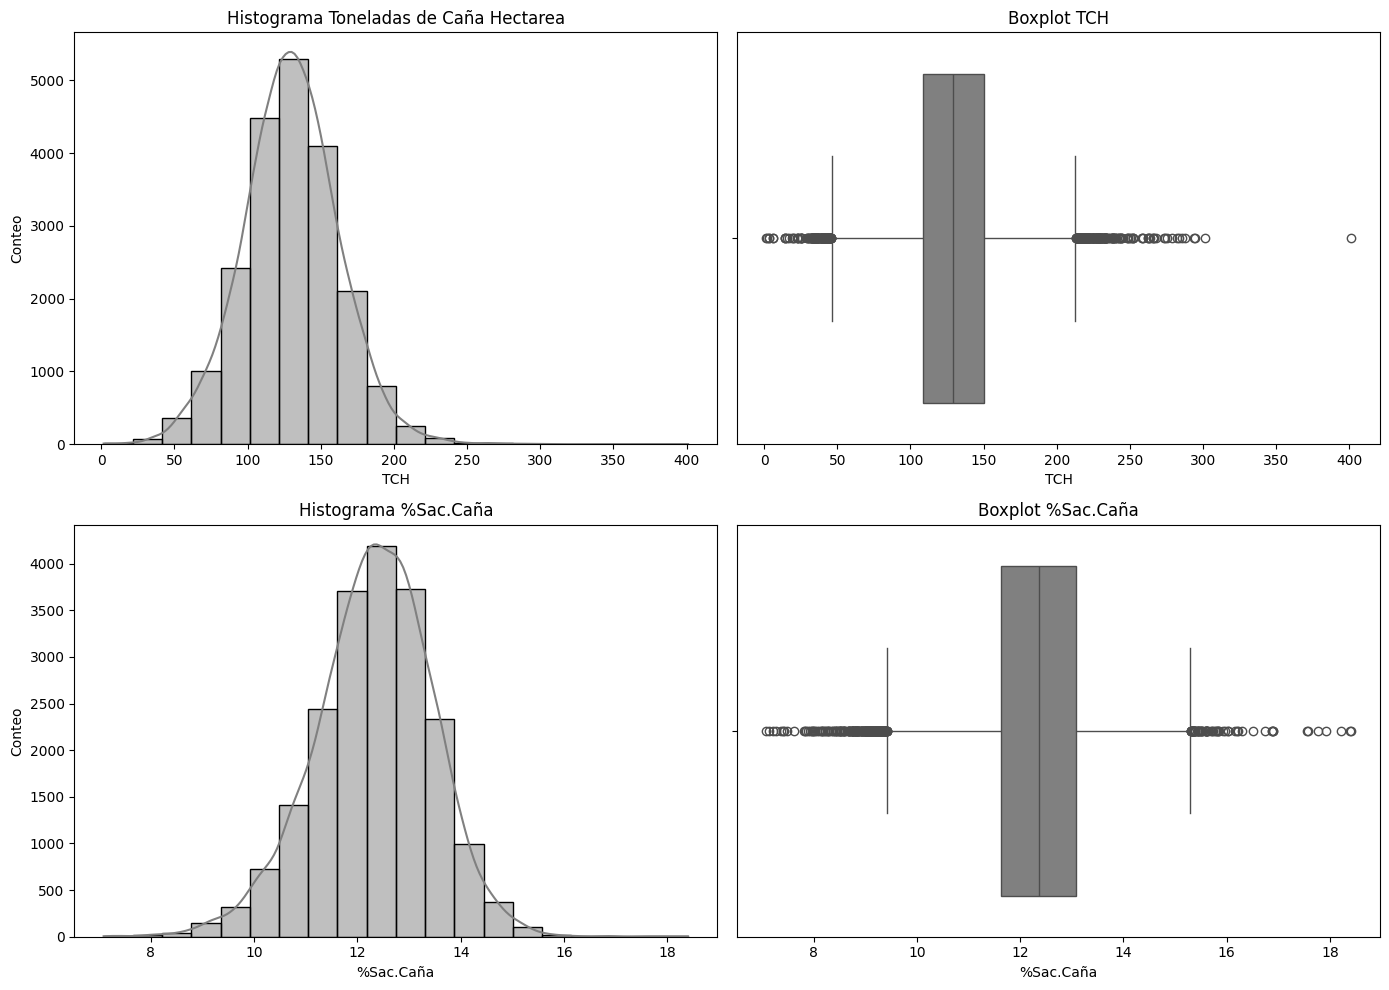

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(14,10))
# histograma
sns.histplot(df_copy['TCH'], bins=20, kde=True, ax=axes[0,0], color="grey")
axes[0,0].set_title("Histograma Toneladas de Caña Hectarea")
axes[0,0].set_xlabel("TCH")
axes[0,0].set_ylabel("Conteo")

# boxplot
sns.boxplot(x=df_copy['TCH'], ax=axes[0,1], color="grey")
axes[0,1].set_title("Boxplot TCH")
axes[0,1].set_xlabel("TCH")

# histograma
sns.histplot(df_copy['%Sac.Caña'], bins=20, kde=True, ax=axes[1,0], color="grey")
axes[1,0].set_title("Histograma %Sac.Caña")
axes[1,0].set_xlabel("%Sac.Caña")
axes[1,0].set_ylabel("Conteo")

# boxplot
sns.boxplot(x=df_copy['%Sac.Caña'], ax=axes[1,1], color="grey")
axes[1,1].set_title("Boxplot %Sac.Caña")
axes[1,1].set_xlabel("%Sac.Caña")

# ajustar grafica
plt.tight_layout()
# mostrar
plt.show()

# Parte 1: Conclusiones
*   Se tiene un data set(df) con 85 columnas/variables independientes y 21027 observaciones. A demas, en el informe descriptivo se observa que muchas de nuestras variables tienen en sus filas informacion NaN, lo cual dependiendo del contexto y el analisis del problema se realizan procesos de imputacion de datos, o eliminacion para dichas variables. En primera instancia, se muestran las principales caracteristicas descriptivas de nuestro conjunto de datos sin modificar, donde vemos los valores en los que se organizan el 25%, 50% y 75% de los datos de cada variable, a demas del rango minimo y maximo de las variable numericas, su media estadistica y la cantidad de valores unicos en las variables categoricas. Nuestro data frame tiene los siguientes tipos de variables:

    * *datos tipo numericos**: Todas aquellas variables que en su contenido almacenan informacion de tipo numerica o decimal.
    
    * *datos tipo fceha**: Todas aquellas variables que en su contenido almacenan informacion de tipo fecha dd/mm/yyyy.
    
    * *datos tipo categorico**: Todas aquellas variables que en su contenido almacenan informacion de tipo clasificable categorica.

*   Se realiza un analisis exploratorio de los datos para observar su distribucion y la calidad de los mismos, esto nos permite, segun la naturaleza del problema, identificar variables que no tienen significancia en el analisis, se implementa la matriz de correlacion, que **cuantifica la dependencia lineal** existente de las variables continuas, y se aprencian algunas "zonas" en la grafica existe alta correlacion entre algunas variables.

* Se definen umbrales de porcentajes y se determina con (✅) aquellas variables que cuentan con un numero de datos relevantes para el analisis del modelo y que, segun la naturaleza del problema aportan informacion significativa relacionadas directamente con la produccion de sacaroza (azucar) en los cultivos de caña.

  1.   **NaN mayor 50%:** En una base de datos con columnas que tienen un %NaN superior al 50% se considera eliminar definitivamente las variables a menos que exista una consideracion o motivo para conservarlas. Por tanto, debido a la naturaleza del problema y a que dichas variables no son significativas, **se eliminan**.

  2.   **NaN entre 20%-50%:** Teniendo en consideracion que columnas con este %NaN estarian afectando directamente el analisis, se debe evaluar especificamente cada uno de los casos y aplicar el mejor criterio. Por tanto, las variables **Fec.Madur** y **Semanas mad.** nos indican la fecha en la que se alcanza la madurez del cultivo y el numero de semanas que transcurrieron hasta alcanzar dicha madurez, ambas cuentan con 46.49%, es decir 9775 datos NaN, debido a ello se decide eliminar dichas variables. (*observacion, ud tambien puede agruparlas y generar una nueva variable llamada Data_Madur**).

      Por otro lado, la variable **Producto** es una variable categorica, y nos da informacion del producto utilizado durante el cultivo para el control y salud de la planta y/o suelos. Por tanto, segun el contexto del problema el porcentaje NaN de 46.50% es decir 9778 datos NaN, nos esta indicando que a dichos cultivos no se aplico ningun producto.
  
      **fertilizantes**

  * agrofosk-m: ferlizante con potacio y fosforo (#datos 54).
  * ✅ Producto_COADYUVANTE  DOUCE: activa e intensifica los procesos fisiologicos necesarios para concentrar la produccion de azucares, transforma los hidratos de carbono desde las hojas hacia los frutos y tallos (#datos 380).
  * ✅ Producto_FERTILIZANTE LIQUIDO RENDIMIENTO: fertilizante rico en fosforo y potacio, permite incrementar y concentrar la sacaroza en los cultivos, es una herramienta importante en lugares donde no pueden usar herbicidas (#datos 179).
  * fertilizante organico paterm: fertilizante (#datos 31).
  * translok: optimiza el proceso de relleno de frutas y granos y aumentar la productividad de los cultivos (#datos 7).

      **herbicidas**

  * amina 2-4D: control de malezas de hoja ancha en cultivos de caña (#datos 2).
  * baykal: para cultivos de arroz (#datos 22).
  * fusilade 2000 bl: eficaz para el control de la mayoria de malezas en cultivos de algodonero, soya, ajo, zanahoria, cebolla de bulbo, papa y café (#datos 84).
  * glifolaq: para el control de malezas en general (#datos 1).
  * herbicida click 40 sc: control de hierbas no deseadas en cultivos de arroz (#datos 1).
  * round-up monsanto 747 granulado: usado generalmente para el control de malezas antes de la siembra (#datos 29).

      **reguladores**

  * ✅ Producto_BONUS 250 EC REGULADOR FISIOLÓGICO y Producto_BONUS 250 EC REGULADOR FISIOLOGICO, se une en una sola variable llamada: Producto_REGULADOR FISIOLOGICO, es un regulador de crecimiento que aumenta el contenido de sacaroza en la caña (#datos 10381).
  * madurante regulador tronnuspac 250 ec: regulador de crecimiento de malezas, es una herramienta de maduracion en caña incrementando los rendimientos o contenidos de sacaroza (#datos 36).
  * madurante bio safe organic: fungicida de malezas (#datos 17).
  * otros madurantes: (#datos 4).
  * producto ensayo en litros: experimento de la casa (#datos 18).

      **ninguno**
  * ✅ vacias: no se utilizo producto en el cultivo (#datos 9778).

  3. **NaN entre 5%-20%:** Se considera imputar o eliminar dependiendo de la variable.

  * Suelo: tiene el 17.88% es decir 3758 datos NaN, y significa el tipo de suelo presente que se uso para el cultivo, pero segun el analisis exploratorio de datos, la informacion suministrada por el data frame no nos da la calidad de datos esperada.
  * vejez: tiene el 11.63% es decir 2445 datos NaN, y significa la antiguedad del cultivo, puede influenciar en la calidad o rendimiento, obserbando la distribucion de estos datos, vemos que presentan gran cantidad de outliers, muchos de ellos muy alejados de los valores intercuartiles, lo cual nos indica que hay mucho sesgo en los datos, puede que se deban a errores en la medicion debido al factor humano.
  * %AR Jugo: tiene el 10.1% es decir 2124 datos NaN, los ouliers se encuntran en los alrededores del limite intercuartil, pero dentro del contexto del problema la variable no representa significancia.
  * fosfato jugo: tiene el 8.84% es decir 1858 datos NaN, los datos presentan outliers muy grandes (min=0, max=105274,7252).
  * %fibra caña: tiene el 8.84% es decir 1858 datos NaN, dentro del contexto no es una variable significativa, a demas presenta colinealidad.
  * ✅ %Sac.Muestreadora: tiene el 8.84% es decir 1858 datos NaN, sacarosa(azucar) presente en el producto.
  * ✅ %Sac.Caña Precosecha:  tiene el 5.22% es decir 1098 datos NaN, sacarosa(azucar) presente en el producto.
  * %ME Min: tiene el 8.19% es decir 1722 datos NaN, colinealidad
  * %ME Veg: tiene el 8.18% es decir 1720 datos NaN, colinealidad
  * %ME Tot: tiene el 8.18% es decir 1720 datos NaN, esta definido como %ME Tot = %ME Min + %ME Veg, no es una variable significativa.
  
  4. **NaN menor 5%:** En estos casos se realiza imputacion de datos (media,mediana,moda,KNN,modelos predictivos de datos faltantes), sin embargo se analizan las variables, encontrando colinealidad en los valores y informacion poco relevante para el problema, por ejemplo:
  
      Las variables Dist Km, Tendencia y Cosechó no aportan significancia, segun la informacion suministrada en el diccionario de variables.Las variables Cod.Estado# y Cod.Estado, representan el estado o situación del cultivo. Tambien las variables Cod. T.Cultivo y Cultivo, representan Código y nombre del cultivo plantado; dichas variables ya sea numérico o en formato texto nos dan la misma informacion, por tanto para efectos de interpretacion se trabajara con la variable numerica; Se tiene entonces la siguiente relacion: Cod.Estado#(0=plantilla, 1=Corte1, 2=Corte2, ...,31=Corte31) y para Cod.T.Cultivo(1=Normal, 2=Organico), se observa que mas del 75% todos los cultivos de caña se realizaron en cultivos de tipo normal.

      Las variables TAH, TAHM y Ton.Azucar me indican las toneladas de azucar extraida, asi como TCH y TCHM toneladas de caña por hectarea. Se decide eliminar las variables TAHM y TCHM proque nos indican la misma informacion, a demas se elimina Ton.Azucar porque a comparacion de TAH, no me da informacion adicional de la cantidad de azucar x unidad de area, es por eso que se considera a TAH como una variable con un valor agregado.

      La variable categorica Tipo Quema, preenta muchos desvalance entre sus categorias, para el analisis del %de produccion de caña nos interesa el procedimiento de quema_VERDE, por tal razon se selecciona solamente esta categoria para el analisi de un modelo de clasificacion.

*   Con las variables independientes seleccionadas se crea un nuevo dataframe, denotado como **df_select** y se calcula nuevamente la matriz de correlacion.

In [ ]:
# creamos un data frame en el cual se van eliminando todas las variables que no nos interesan para el analisis posterior
df_clean = df_copy.drop(columns=var50_nan.index.tolist() + ['Fec.Madur.', 'Semanas mad.', 'Producto', 'Tipo Quema', 'Zona', 'Vejez', 'Suelo', '%AR Jugo', 'Fosfato Jugo',
                                                            '%Fibra Caña', '%ME Min', '%ME Veg', '%ME Tot', 'Dist Km','Tenencia','Cosechó',
                                                            'Cod.Estado','Cultivo', 'TCHM', 'TAHM', 'Ton.Azucar', 'Nombre', 'Suerte', 'Variedad',
                                                            'TonUltCorte', '%ATR', 'KATRHM', 'Brix', 'T.Corte', 'Cerca de', 'M3 Riego', 'DDUlt.Riego',
                                                            'Lluvias (2 Meses Ant.)', 'Lluvias Ciclo', 'Lluvias 0 -3', 'Lluvias tres a seis', 'Lluvias seis a nueve', 'Luvias 9 -FC'])

In [ ]:
# df_select es entonces el DATAFRAME DE LAS VARIABLES PREDICTORAS SELECCIONADAS
df_select = pd.concat([dummy_producto_dropped, dummy_quema, dummy_zona, df_clean], axis=1)
df_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Producto_COADYUVANTE  DOUCE                21027 non-null  bool          
 1   Producto_FERTILIZANTE LIQUIDO RENDIMIENTO  21027 non-null  bool          
 2   Producto_REGULADOR FISIOLOGICO             21027 non-null  bool          
 3   quema_VERDE                                21027 non-null  bool          
 4   zona_IP01                                  21027 non-null  bool          
 5   zona_IP02                                  21027 non-null  bool          
 6   zona_IP03                                  21027 non-null  bool          
 7   zona_IP05                                  21027 non-null  bool          
 8   zona_IP06                                  21027 non-null  bool          
 9   Período          

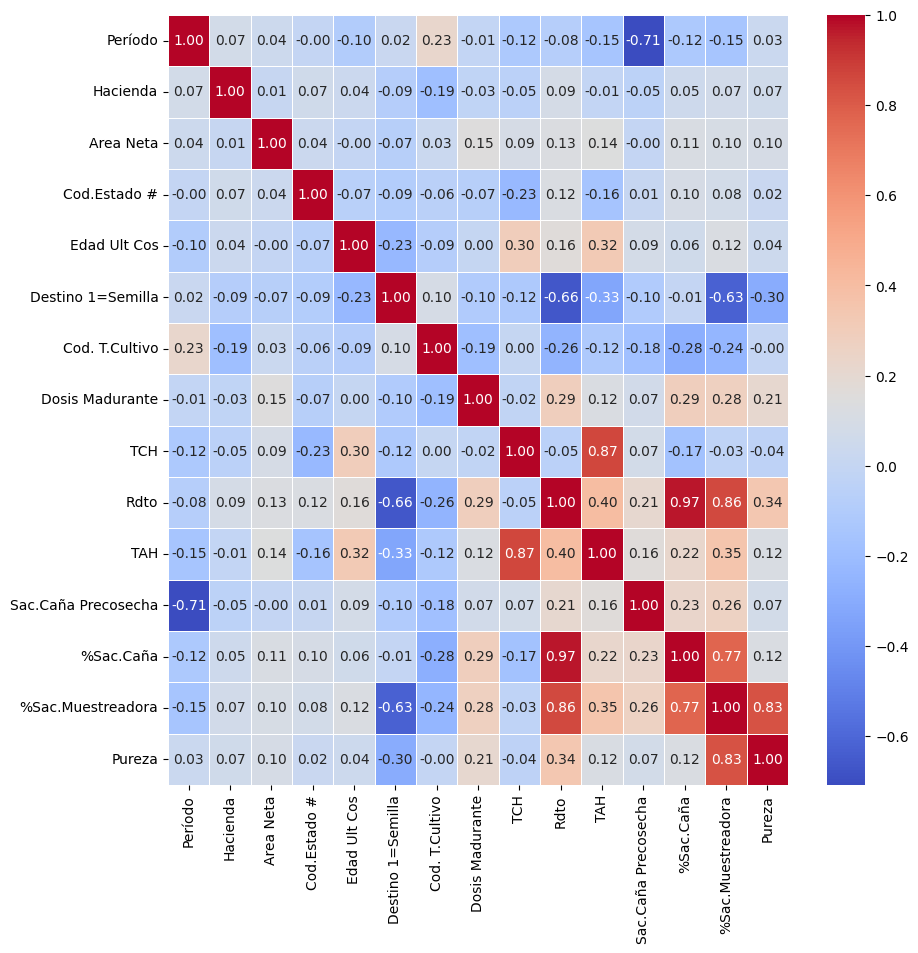

In [ ]:
corr_df_select = df_select.select_dtypes(include='number').corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_df_select, annot=True, cmap='coolwarm', fmt = '.2f', linewidths=0.5)
plt.show()

# Ajuste Modelo Regresión Lineal